# Analisys of neighborhoods in Barcelona

## 1. Introduction: Aim

The aim of this project is to get a better quantitative understanding of the different neighborhoods of Barcelona. In order to do so we will download some datasets that are available through the webiste of the open data platform from the Barcelona city hall and clean them, process them and analyse them.

Some of the questions we want to be able to answer are listed below:

* Do neighborhoods belonging to the same district share some characteristics? Can these be identified?

* Are there significant differences in terms of wealth (average income) between the differnt neighborhoods or districts?

* Do these differences corroborate the popular knowledge of Barcelona's wealthiest districts (Sarria, Sant Gervasi, Vallvidrera, etc.)?

* Are there differences in terms of cultural equipments between the neighborhoods? Do they correlate to other variables?

* Do we find different geographic patterns of vehicles based on the geography of the neighborhood? Do they correlate to any variable, like wealth?

* Are there any patterns in the number of animals each neighborhood has?

* Does the amount of health centers (CAPs: Primary Healthcare Center, Hospitals and Clinics) relate to de population density, wealth or other variables of each neighborhood?

* Does the distance to the sea, have any relation or effect on any socio-economic variables of the neighborhoods?


## 2. Data Extraction

We extracted most of the data from the open data portal of Barcelona:
https://opendata-ajuntament.barcelona.cat

Below we list the datasets and sources, together with a brief description:

* Pensions:
This dataset contains information about the 245 pensions that exist in Barcelona, it includes in which neighborhood they are located
    - Source: https://opendata-ajuntament.barcelona.cat/data/es/dataset/allotjaments-pensions
    - Name: opendatabcn_allotjament_pensions-csv.csv


* Hotels:
Dataset of the hotels in Barcelona
    - Source https://opendata-ajuntament.barcelona.cat/data/es/dataset/allotjaments-hotels
    - Name: opendatabcn_allotjament_hotels-csv.csv


* Other accomodations:
Dataset of other types of accomodations, excluding Hotels and Pensions
    - Source: https://opendata-ajuntament.barcelona.cat/data/es/dataset/allotjaments-altres
    - Name: opendatabcn_allotjament_altres-allotjaments-csv


* Trees:
Dataset with the number of trees per area
    - Source https://opendata-ajuntament.barcelona.cat/data/es/dataset/arbrat-zona
    - Name: OD_Arbrat_Zona_BCN.csv
    
    
* Accidents:
Number of accidents per neighborhood, containing extra info
    - Source: https://opendata-ajuntament.barcelona.cat/data/es/dataset/accidents_causa_conductor_gu_bcn
    - Name: 2023_accidents_causa_conductor_gu_bcn_.csv


* Healthcare installations:
Installations related to healthcare, including Hospitals, clinics and CAPs
    - Source: https://opendata-ajuntament.barcelona.cat/data/es/dataset/equipament-sanitat
    - Name: opendatabcn_llista-equipaments_sanitat-csv.csv


* Pharmacies:
Dataset with the pharmacies in Barcelona
    - Source: https://opendata-ajuntament.barcelona.cat/data/es/dataset/sanitat-farmacies
    - Name: opendatabcn_sanitat_farmacies.csv


* Migration:
Dataset with migration percentages, including incoming and outcoming
    - Source: https://opendata-ajuntament.barcelona.cat/data/es/dataset/est-demo-taxa-migracio-interna
    - Name: 2021_taxa_migracio_interna


* Civic Centers:
Dataset with the civic centers of Barcelona
    - Source: https://opendata-ajuntament.barcelona.cat/data/es/dataset/centres-civics-metres-quadrats
    - Name: 2021_centres_civics_metres_quadrats.csv


* Animals:
Dataset with the number of registered animals per district
    - Source: https://opendata-ajuntament.barcelona.cat/data/es/dataset/cens-animals-companyia
    - Name: 2021_censos_animals_long.csv


* Unemployment rate:
Unemployment rate in the age range of 16-64 per neighborhood
    - Source: https://opendata-ajuntament.barcelona.cat/data/es/dataset/est-atur-pes
    - Name: 2021_pes_del_atur_registrat_sobre_poblacio_16_64_anys.csv

* Household average income:
Dataset with the average income per household
    - Source: https://opendata-ajuntament.barcelona.cat/data/es/dataset/renda-tributaria-unitat-consum-atlas-distribucio
    - Name: 2021_renda_neta_mitjana_per_llar.csv
    

* Person average income:
Dataset with the average income per person
    - Source: https://opendata-ajuntament.barcelona.cat/data/es/dataset/renda-tributaria-per-persona-atlas-distribucio
    - Name: 2021_renda_neta_mitjana_per_persona.csv


* Vehicles:
Dataset with the number of registered vehicles
    - Source: https://opendata-ajuntament.barcelona.cat/data/es/dataset/est_vehicles_evolucio_total
    - Name: 2021_vehicles_evo_total.csv


* Population Cens (2016):
Curated "by hand" from the source, population statistics per neighborhood.
     - Source https://ajuntament.barcelona.cat/estadistica/catala/Anuaris/Anuaris/anuari17/cap01/C0101050.htm
     - Name neighborhood population stats


For the current project the datasets are saved in the folder "data", which contains some subfolders like "raw" for raw data or "prepreocessed" for preprocessed data.

Let's explore it a bit!

## 3. Data exploration

From wikipedia we can obtain a visual representation of the grographical distribution of the neighborhoods in Barcelona.


Source: https://es.wikipedia.org/wiki/Distritos_de_Barcelona

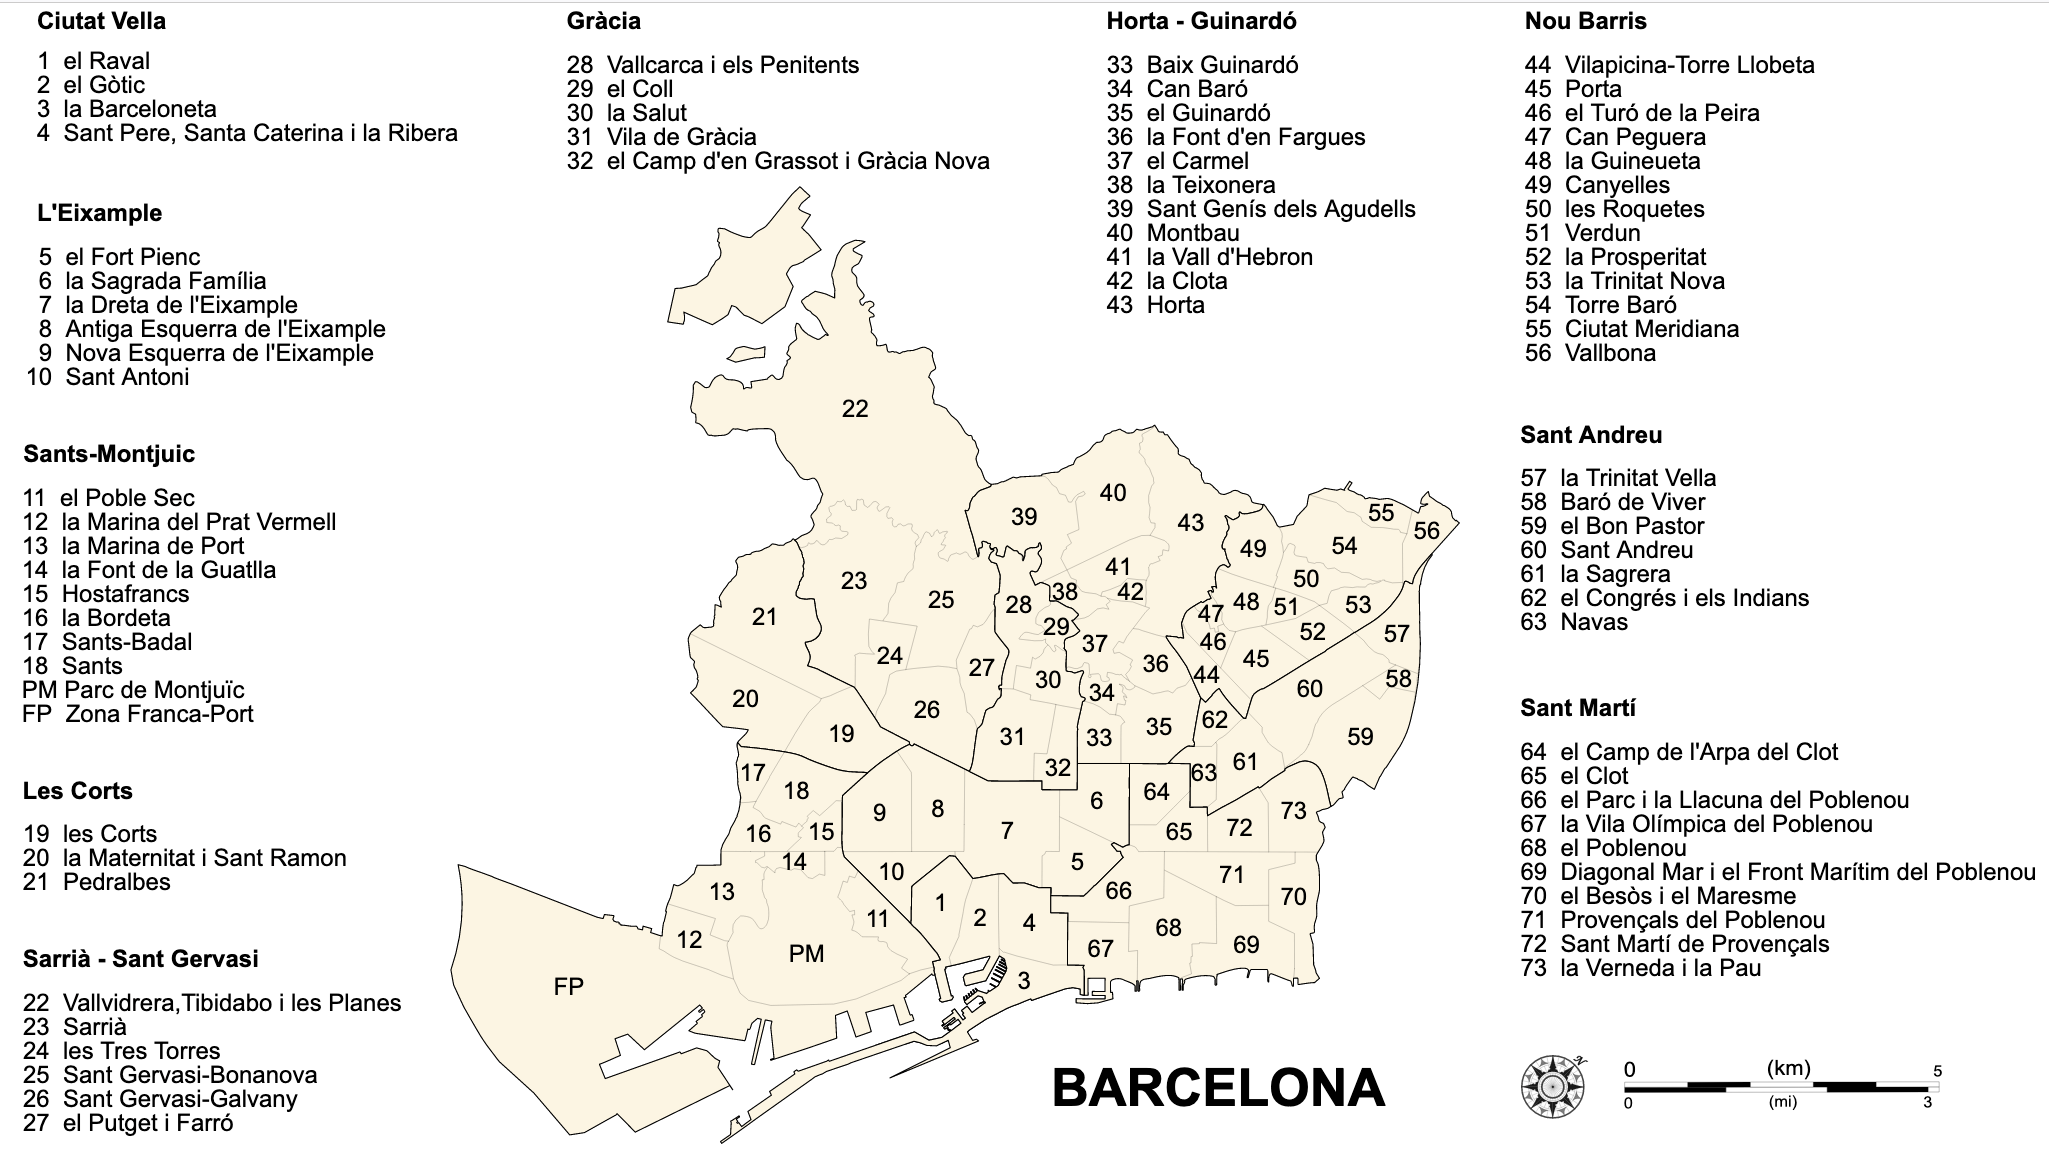

We start analyzing our data by importing the modules and loading it

In [88]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
import os
import glob
from natsort import natsorted

In [90]:
population_df = pd.read_csv("data/raw/neighborhood_population_stats.csv", index_col=0)
population_df

,nom_barri,poblacio,superficie,superficie_residencial,densitat,densitat_neta
codi_barri,,,,,,
1,el Raval,47129,109.8,49.7,429.1,948.2
2,el Barri Gòtic,15614,84.2,34.1,185.4,457.2
3,la Barceloneta,15021,131.4,13.5,114.3,1113.2
4,Sant Pere Santa Caterina I la Ribera,22306,111.4,32.4,200.2,688.7
5,el Fort Pienc,31653,92.9,33.4,340.8,947.7
...,...,...,...,...,...,...
69,Diagonal Mar i el Front Marítim del Poblenou,13397,123.7,23.0,108.3,581.9
70,el Besòs i el Maresme,22746,127.4,25.6,178.5,887.8
71,Provençals del Poblenou,20369,110.5,13.5,184.3,1510.9


array([[<AxesSubplot:title={'center':'poblacio'}>,
        <AxesSubplot:title={'center':'superficie'}>],
       [<AxesSubplot:title={'center':'superficie_residencial'}>,
        <AxesSubplot:title={'center':'densitat'}>],
       [<AxesSubplot:title={'center':'densitat_neta'}>, <AxesSubplot:>]],
      dtype=object)

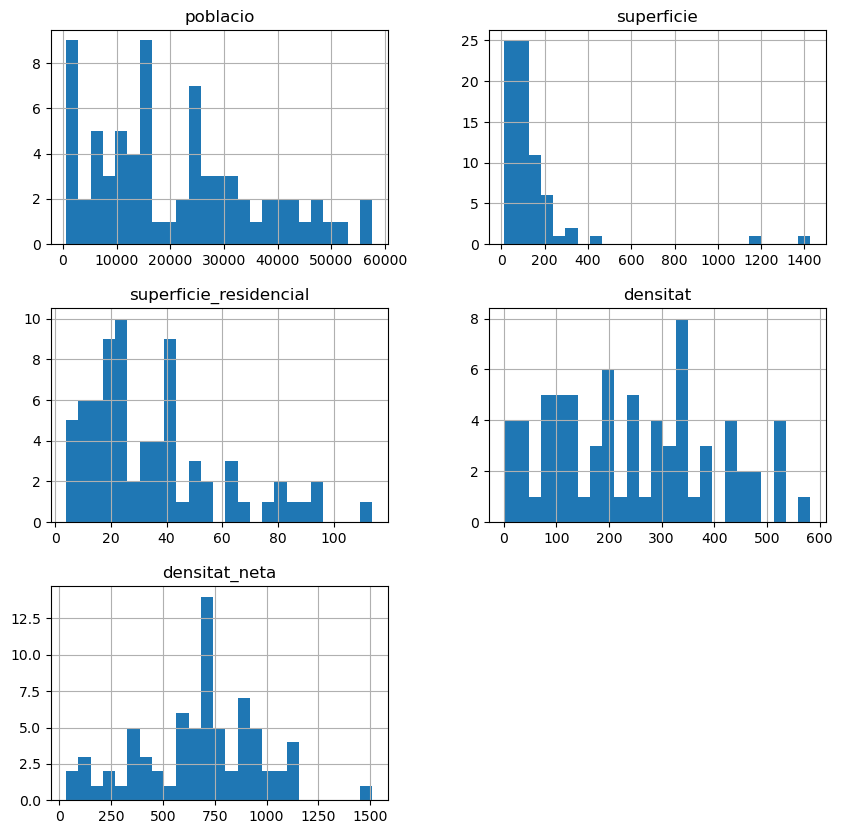

In [91]:
population_df.hist(bins=25, figsize=(10,10))

In [92]:
population_df.describe()

,poblacio,superficie,superficie_residencial,densitat,densitat_neta
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,21293.575342,139.943836,35.454795,247.978082,678.901370
std,15024.109031,210.067389,24.862880,152.911957,291.686281
min,583.000000,12.000000,3.900000,0.800000,31.800000
25%,9400.000000,59.500000,18.100000,114.800000,492.700000
50%,16473.000000,92.900000,27.300000,240.000000,704.000000
75%,30385.000000,132.600000,43.000000,347.000000,886.800000
max,57648.000000,1428.400000,113.900000,582.300000,1510.900000


array([[<AxesSubplot:xlabel='poblacio', ylabel='poblacio'>,
        <AxesSubplot:xlabel='superficie', ylabel='poblacio'>,
        <AxesSubplot:xlabel='superficie_residencial', ylabel='poblacio'>,
        <AxesSubplot:xlabel='densitat', ylabel='poblacio'>,
        <AxesSubplot:xlabel='densitat_neta', ylabel='poblacio'>],
       [<AxesSubplot:xlabel='poblacio', ylabel='superficie'>,
        <AxesSubplot:xlabel='superficie', ylabel='superficie'>,
        <AxesSubplot:xlabel='superficie_residencial', ylabel='superficie'>,
        <AxesSubplot:xlabel='densitat', ylabel='superficie'>,
        <AxesSubplot:xlabel='densitat_neta', ylabel='superficie'>],
       [<AxesSubplot:xlabel='poblacio', ylabel='superficie_residencial'>,
        <AxesSubplot:xlabel='superficie', ylabel='superficie_residencial'>,
        <AxesSubplot:xlabel='superficie_residencial', ylabel='superficie_residencial'>,
        <AxesSubplot:xlabel='densitat', ylabel='superficie_residencial'>,
        <AxesSubplot:xlabel='densi

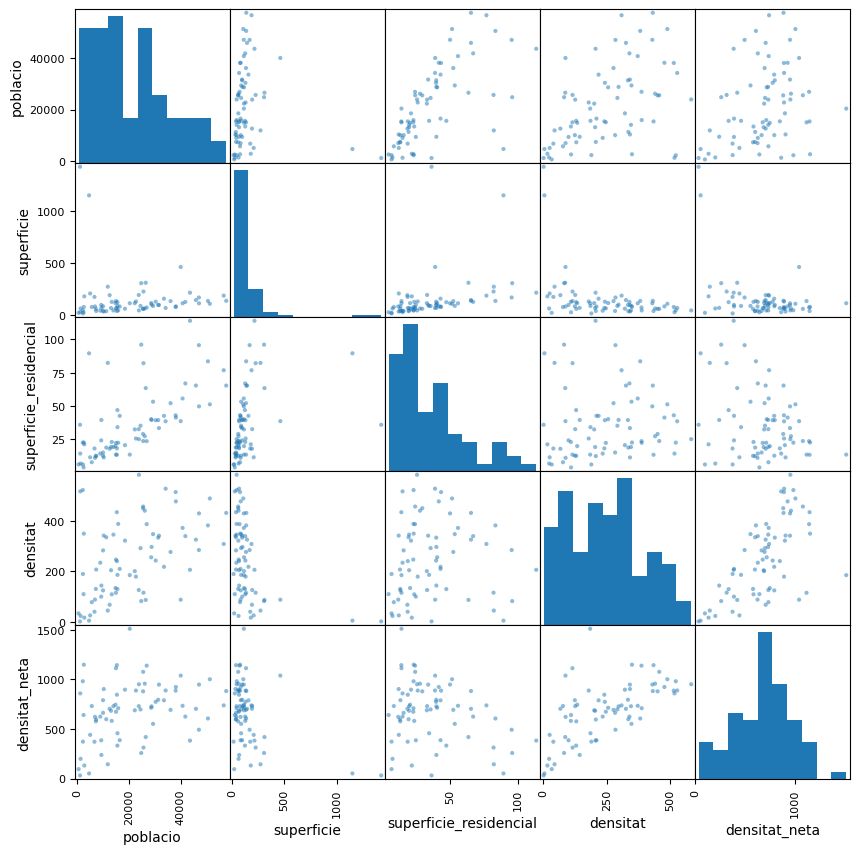

In [93]:
from pandas.plotting import scatter_matrix
scatter_matrix(population_df, figsize=(10,10))

Most of our data, however, is in the other csv files. Let's explore them too:

In [94]:
# Datasets
datasets = natsorted(glob.glob("data/raw/*.csv"))

In [95]:
datasets

['data/raw/2021_Pes_del_atur_registrat_sobre_poblacio_16_64_anys.csv',
 'data/raw/2021_accidents_causa_conductor_gu_bcn_.csv',
 'data/raw/2021_censos_animals_long.csv',
 'data/raw/2021_centres_civics_metres_quadrats.csv',
 'data/raw/2021_renda_neta_mitjana_per_llar.csv',
 'data/raw/2021_renda_neta_mitjana_per_persona.csv',
 'data/raw/2021_taxa_migracio_interna.csv',
 'data/raw/2021_vehicles_evo_total.csv',
 'data/raw/OD_Arbrat_Zona_BCN.csv',
 'data/raw/neighborhood_population_stats.csv',
 'data/raw/opendatabcn_administracio_comissaries-de-policia.csv',
 'data/raw/opendatabcn_allotjament_altres-allotjaments-csv.csv',
 'data/raw/opendatabcn_allotjament_hotels-csv.csv',
 'data/raw/opendatabcn_allotjament_pensions-csv.csv',
 'data/raw/opendatabcn_llista-equipaments_sanitat-csv.csv',
 'data/raw/opendatabcn_sanitat_farmacies.csv']

In [96]:
# We check if the datasets, for instance the one with the household average income also has 73 neighborhoods

In [97]:
my_dataset = "data/raw/2021_renda_neta_mitjana_per_llar.csv"
df = pd.read_csv(my_dataset)
df.groupby("Codi_Barri").size().reset_index()["Codi_Barri"]
#df.head()

0      1
1      2
2      3
3      4
4      5
      ..
68    69
69    70
70    71
71    72
72    73
Name: Codi_Barri, Length: 73, dtype: int64

Yes!

In [98]:
# We observe some datasets have the csv in a utf-16 encoding instead of the expected or default utf-8

In [99]:
my_dataset = "data/raw/opendatabcn_allotjament_altres-allotjaments-csv.csv"
df = pd.read_csv(my_dataset)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

We create a function that can handle utf-8 and utf-16:

In [ ]:
def read_csv_encoding_robust(csv_path):
    """
    Return a dataframe from a csv_path, regardless of encoding utf-8 or utf-16
    """
    try:
        df = pd.read_csv(csv_path) 
    except UnicodeDecodeError:
        df = pd.read_csv(csv_path, encoding='utf-16')
    return df

In [ ]:
df = read_csv_encoding_robust(my_dataset)
df.head()

Check if all datasets have the column codi_barri

In [100]:
for dataset in datasets:
    #print(dataset)
    df = read_csv_encoding_robust(dataset)
    # bring all column names to lowercase
    df.columns = df.columns.str.lower()
    if "codi_barri" not in df.columns:
        print(f"The dataset {dataset} has no column 'codi_barri' but has:\n: {df.columns}\n")
#        print(df.columns)

The dataset data/raw/2021_censos_animals_long.csv has no column 'codi_barri' but has:
: Index(['_id', 'codi_districte', 'nom_districte', 'semestre', 'num_animal'], dtype='object')

The dataset data/raw/opendatabcn_administracio_comissaries-de-policia.csv has no column 'codi_barri' but has:
: Index(['register_id', 'name', 'institution_id', 'institution_name', 'created',
       'modified', 'addresses_roadtype_id', 'addresses_roadtype_name',
       'addresses_road_id', 'addresses_road_name',
       'addresses_start_street_number', 'addresses_end_street_number',
       'addresses_neighborhood_id', 'addresses_neighborhood_name',
       'addresses_district_id', 'addresses_district_name',
       'addresses_zip_code', 'addresses_town', 'addresses_main_address',
       'addresses_type', 'values_id', 'values_attribute_id', 'values_category',
       'values_attribute_name', 'values_value', 'values_outstanding',
       'values_description', 'secondary_filters_id', 'secondary_filters_name',
       

If they don't have codi_barri do they have addresses_neighborhood_id?


In [101]:
for dataset in datasets:
    #print(dataset)
    try:
        df = pd.read_csv(dataset) 
    except UnicodeDecodeError:
        df = pd.read_csv(dataset, encoding='utf-16')
    # bring all column names to lowercase
    df.columns = df.columns.str.lower()
    if "codi_barri" in df.columns or "addresses_neighborhood_id" in df.columns:
        continue
    else:   
        print(f"The dataset {dataset} has no column 'codi_barri' but has:\n: {df.columns}\n")
#        print(df.columns)

The dataset data/raw/2021_censos_animals_long.csv has no column 'codi_barri' but has:
: Index(['_id', 'codi_districte', 'nom_districte', 'semestre', 'num_animal'], dtype='object')



No, the dataset censos animals does not contain codi_barri nor addresses_neighborhood_id, let's check how it looks like:

In [102]:
df_animals = pd.read_csv("data/raw/2021_censos_animals_long.csv")
df_animals.head(20)

,_id,CODI_DISTRICTE,NOM_DISTRICTE,SEMESTRE,NUM_ANIMAL
0,1,1,Ciutat Vella,1er,3799
1,1,1,Ciutat Vella,2on,3869
2,2,2,Eixample,1er,10155
3,2,2,Eixample,2on,10375
4,3,3,Sants-Montjuïc,1er,8962
5,3,3,Sants-Montjuïc,2on,9119
6,4,4,Les Corts,1er,3790
7,4,4,Les Corts,2on,3846
8,5,5,Sarrià-Sant Gervasi,1er,6112
9,5,5,Sarrià-Sant Gervasi,2on,6243


All but the 2021_censos_animals_long.csv datasets have an ID for the neighborhood.
We want to use this dataset, even if it is only segregated by district. We will work on this special dataset later.

## 4. Data Cleaning and Preprocessing

### 4.1. Preprocessing

Data exploration, and data cleaning and preprocessing go hand by hand. After every cleaning step we also want to explore the data, and most important we want to explore the data once all the preprocessing has been done. For a more detailed data exploration look at the end of the Data Cleaning and Preprocessing part.

For some datasets we can group by neighborhood and count the entries, because we want to count the number of entries in the dataset, like the number of accidents:

In [103]:
my_df = pd.read_csv("data/raw/2021_accidents_causa_conductor_gu_bcn_.csv")

In [104]:
my_df.groupby("Codi_barri").size().rename("number of accidents").to_frame()

,number of accidents
Codi_barri,
-1,31
1,138
2,121
3,136
4,109
...,...
69,95
70,95
71,146


For others we need to calculate the mean, for instance for the unemployment rate we have multiple entries for each neighborhood, so we will compute the mean:

In [105]:
df = read_csv_encoding_robust("data/raw/2021_Pes_del_atur_registrat_sobre_poblacio_16_64_anys.csv")

<AxesSubplot:xlabel='Codi_Barri', ylabel='Pes_atur'>

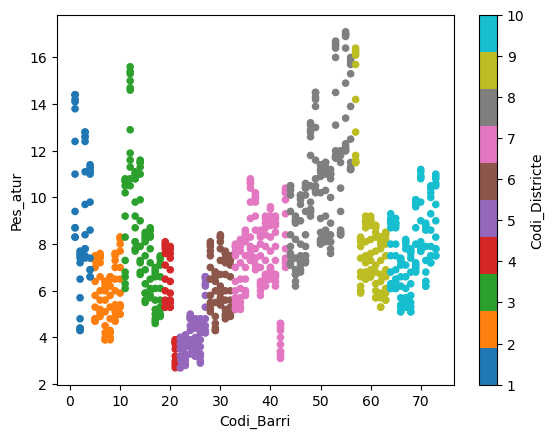

In [106]:
df.plot(kind="scatter", x="Codi_Barri", y="Pes_atur", c="Codi_Districte", colormap="tab10")

In [107]:
groupby_var = "codi_barri"
value="pes_atur"
df.columns = df.columns.str.lower()
new_df = df.groupby(groupby_var)[value].mean().rename(value).to_frame() 

In [108]:
new_df

,pes_atur
codi_barri,
1,11.475000
2,5.983333
3,10.241667
4,9.066667
5,6.083333
...,...
69,8.375000
70,9.408333
71,7.583333


<AxesSubplot:xlabel='codi_barri', ylabel='pes_atur'>

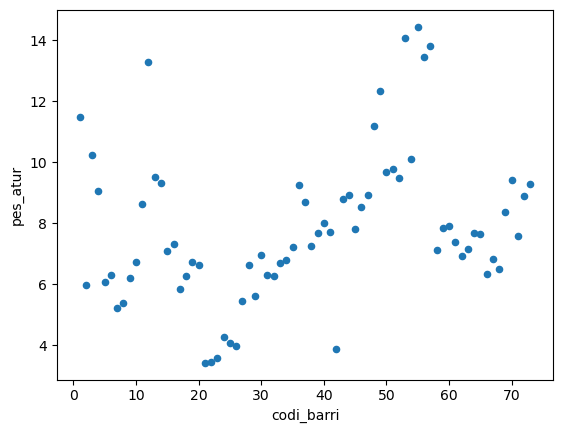

In [109]:
new_df.reset_index().plot(kind="scatter", x="codi_barri", y="pes_atur")

To do this for all datasets, we create a dictionary with the datasets as keys and the value to extract as value. If what we want to extract is just the count fo items per neighborhood, we write the word "count" on the value.

In [110]:
# We create a dict of the features we want to extract for each dataset:
my_dataset_dict = {
'data/raw/2021_Pes_del_atur_registrat_sobre_poblacio_16_64_anys.csv': "pes_atur",
'data/raw/2021_accidents_causa_conductor_gu_bcn_.csv': "accident_count",
'data/raw/2021_censos_animals_long.csv': "avg_num_animal",
'data/raw/2021_centres_civics_metres_quadrats.csv': "centre_civic_count",
'data/raw/2021_renda_neta_mitjana_per_llar.csv': "import_euros",
'data/raw/2021_renda_neta_mitjana_per_persona.csv': "import_euros",
'data/raw/2021_taxa_migracio_interna.csv': "incoming_neighbors",
'data/raw/2021_vehicles_evo_total.csv': "total",
'data/raw/OD_Arbrat_Zona_BCN.csv': "trees_count",
'data/raw/neighborhood_population_stats.csv': "densitat_neta",
'data/raw/opendatabcn_administracio_comissaries-de-policia.csv': "police_office_count",
'data/raw/opendatabcn_allotjament_altres-allotjaments-csv.csv': "tourist_accomodation_count",
'data/raw/opendatabcn_allotjament_hotels-csv.csv': "hotel_count",
'data/raw/opendatabcn_allotjament_pensions-csv.csv': "pension_count",
'data/raw/opendatabcn_llista-equipaments_sanitat-csv.csv': "secondary_filters_name",
'data/raw/opendatabcn_sanitat_farmacies.csv': "pharmacy_count"
}

We create a folder where to store the preprocessed data

In [111]:
preprocessed_data_folder = "data/preprocessed/"

We create a function to be able to rename the column name that identifies the neighboorhood, because it is not the same in all the datasets:

In [112]:
# We define some useful functions
def rename_neighborhood_id(df, current_id, new_id="codi_barri"):
    """
    Rename the selected column (current_id) by the new id
    """
    if new_id in df.columns:
        pass
    elif current_id in df.columns:
        df.rename(columns={current_id: new_id}, inplace=True)
    else:
        raise KeyError(f"Column {current_id} does not exist in the DataFrame")

Since all the datasets cant be compute to easily, we will skip some that will need more detailed analysis:

In [113]:
keys_to_skip = ["animals", "population_stats", "equipaments_sanitat", "migracio"]


In [114]:
groupby_var = "codi_barri"


for key, value in my_dataset_dict.items():
    #print(key, value)
    # Let's skip more complex datasets for now
    if any(skip_key in key for skip_key in keys_to_skip):
        print(f"\n!!!Skipping {key}!!!\n")
        continue
    df = read_csv_encoding_robust(key)

    # bring all column names to lowercase
    df.columns = df.columns.str.lower()
    
    current_id = "addresses_neighborhood_id"
    rename_neighborhood_id(df, current_id, new_id="codi_barri")
    
    if "count" in value:
        try:
            new_df = df.groupby(groupby_var).size().rename(value).to_frame()
        except:
            raise Exception(f"Error, could not group by {value}, revise your dataframe {key}") 
    else:
        try:
            new_df = df.groupby(groupby_var)[value].mean().rename(value).to_frame() 
        except:
            raise Exception(f"Error, could not group by {value}, revise your dataframe {key}")
    
    # Save the processed dataframe
    dataset_filename = os.path.basename(key)
    new_df.to_csv(os.path.join(preprocessed_data_folder, dataset_filename))



!!!Skipping data/raw/2021_censos_animals_long.csv!!!


!!!Skipping data/raw/2021_taxa_migracio_interna.csv!!!


!!!Skipping data/raw/neighborhood_population_stats.csv!!!


!!!Skipping data/raw/opendatabcn_llista-equipaments_sanitat-csv.csv!!!



Let's see how the pre processed data looks like now:

In [115]:
preprocessed_datasets = glob.glob("data/preprocessed/*.csv")

#change this if you want to see less datasets
show_n_datasets = len(preprocessed_datasets) # change to 5 e.g.

for i, dataset in enumerate(preprocessed_datasets):
    print(dataset)
    df = pd.read_csv(dataset, index_col=0)
    print(df.head(10))
    print("\n")
    if i==show_n_datasets: break

data/preprocessed/opendatabcn_allotjament_hotels-csv.csv
            hotel_count
codi_barri             
1                    50
2                    58
3                     5
4                    23
5                    10
6                     4
7                    94
8                    28
9                    16
10                   14


data/preprocessed/caps.csv
            caps
codi_barri      
1              3
2              1
3              1
4              1
5              3
6              2
7              1
8              1
9              2
10             2


data/preprocessed/population_density.csv
            densitat_neta
codi_barri               
1                   948.2
2                   457.2
3                  1113.2
4                   688.7
5                   947.7
6                  1001.9
7                   383.2
8                   625.2
9                   882.8
10                  923.7


data/preprocessed/pharmacy.csv
            pharmacy
codi_barri   

Most of these variables make more sense to consider normalized by number of habitants in the neighborhood.
For example, it is little telling to compare one neighborhood with 5 pharmacies to another one with 2, if the first has 10 times more population. For that we will use the dataset with the population per neighborhood. But before that, let's preprocess the other datasets that we left for later, now it is their time:

* data/raw/2021_censos_animals_long.csv

* data/raw/2021_taxa_migracio_interna.csv

* data/raw/opendatabcn_llista-equipaments_sanitat-csv.csv

* data/raw/neighborhood_population_stats.csv* data/raw/neighborhood_population_stats.csv

#### 4.1.1. Animal cens

In [116]:
df_animals = pd.read_csv("data/raw/2021_censos_animals_long.csv")
df_animals.head(4)

,_id,CODI_DISTRICTE,NOM_DISTRICTE,SEMESTRE,NUM_ANIMAL
0,1,1,Ciutat Vella,1er,3799
1,1,1,Ciutat Vella,2on,3869
2,2,2,Eixample,1er,10155
3,2,2,Eixample,2on,10375


First we will compute the average NUM_ANIMAL for the year 2021, by calculating the mean of the two semesters:


In [117]:
df_animals.columns = df_animals.columns.str.lower()
df_animals = df_animals.groupby("codi_districte")["num_animal"].mean().reset_index()

In [118]:
df_animals

,codi_districte,num_animal
0,1,3834.0
1,2,10265.0
2,3,9040.5
3,4,3818.0
4,5,6177.5
5,6,5732.5
6,7,7887.0
7,8,8352.0
8,9,7411.0
9,10,10158.0


Now we will use one of the datasets that contains the "codi_districtte" and the codi_barri to map the number of animals to each barri.

In [119]:
df_ids = pd.read_csv("data/raw/2021_renda_neta_mitjana_per_llar.csv")
df_ids.columns = df_ids.columns.str.lower()

df_ids = df_ids[["codi_districte", "codi_barri"]]
df_ids = df_ids.drop_duplicates(subset=['codi_barri'], keep="first").reset_index()
df_ids.drop(columns="index", inplace=True)
df_ids

,codi_districte,codi_barri
0,1,1
1,1,2
2,1,3
3,1,4
4,2,5
...,...,...
68,10,69
69,10,70
70,10,71
71,10,72


In [120]:
# merge by codi_districte
df_animals = df_animals.merge(df_ids, on='codi_districte', how='inner')
df_animals

,codi_districte,num_animal,codi_barri
0,1,3834.0,1
1,1,3834.0,2
2,1,3834.0,3
3,1,3834.0,4
4,2,10265.0,5
...,...,...,...
68,10,10158.0,69
69,10,10158.0,70
70,10,10158.0,71
71,10,10158.0,72


We add the population of each neighborhood to the dataset:

In [121]:
df_animals = df_animals.merge(population_df, on='codi_barri', how='inner')
df_animals

,codi_districte,num_animal,codi_barri,nom_barri,poblacio,superficie,superficie_residencial,densitat,densitat_neta
0,1,3834.0,1,el Raval,47129,109.8,49.7,429.1,948.2
1,1,3834.0,2,el Barri Gòtic,15614,84.2,34.1,185.4,457.2
2,1,3834.0,3,la Barceloneta,15021,131.4,13.5,114.3,1113.2
3,1,3834.0,4,Sant Pere Santa Caterina I la Ribera,22306,111.4,32.4,200.2,688.7
4,2,10265.0,5,el Fort Pienc,31653,92.9,33.4,340.8,947.7
...,...,...,...,...,...,...,...,...,...
68,10,10158.0,69,Diagonal Mar i el Front Marítim del Poblenou,13397,123.7,23.0,108.3,581.9
69,10,10158.0,70,el Besòs i el Maresme,22746,127.4,25.6,178.5,887.8
70,10,10158.0,71,Provençals del Poblenou,20369,110.5,13.5,184.3,1510.9
71,10,10158.0,72,Sant Martí de Provençals,2601,74.5,22.6,348.9,1148.6


In [122]:
population_by_district = df_animals.groupby("codi_districte")["poblacio"].sum().rename("poblacio_districte").reset_index()
population_by_district

,codi_districte,poblacio_districte
0,1,100070
1,2,264305
2,3,180977
3,4,81642
4,5,148026
5,6,120918
6,7,167268
7,8,153847
8,9,126859
9,10,210519


In [123]:
df_animals = df_animals.merge(population_by_district, on="codi_districte", how="inner")
df_animals

,codi_districte,num_animal,codi_barri,nom_barri,poblacio,superficie,superficie_residencial,densitat,densitat_neta,poblacio_districte
0,1,3834.0,1,el Raval,47129,109.8,49.7,429.1,948.2,100070
1,1,3834.0,2,el Barri Gòtic,15614,84.2,34.1,185.4,457.2,100070
2,1,3834.0,3,la Barceloneta,15021,131.4,13.5,114.3,1113.2,100070
3,1,3834.0,4,Sant Pere Santa Caterina I la Ribera,22306,111.4,32.4,200.2,688.7,100070
4,2,10265.0,5,el Fort Pienc,31653,92.9,33.4,340.8,947.7,264305
...,...,...,...,...,...,...,...,...,...,...
68,10,10158.0,69,Diagonal Mar i el Front Marítim del Poblenou,13397,123.7,23.0,108.3,581.9,210519
69,10,10158.0,70,el Besòs i el Maresme,22746,127.4,25.6,178.5,887.8,210519
70,10,10158.0,71,Provençals del Poblenou,20369,110.5,13.5,184.3,1510.9,210519
71,10,10158.0,72,Sant Martí de Provençals,2601,74.5,22.6,348.9,1148.6,210519


We calculate the eprcentage of people from the district, living in each neighborhood

In [124]:
df_animals["neighborhood_percentage_of_district_population"]=df_animals["poblacio"]/df_animals["poblacio_districte"]
df_animals

,codi_districte,num_animal,codi_barri,nom_barri,poblacio,superficie,superficie_residencial,densitat,densitat_neta,poblacio_districte,neighborhood_percentage_of_district_population
0,1,3834.0,1,el Raval,47129,109.8,49.7,429.1,948.2,100070,0.470960
1,1,3834.0,2,el Barri Gòtic,15614,84.2,34.1,185.4,457.2,100070,0.156031
2,1,3834.0,3,la Barceloneta,15021,131.4,13.5,114.3,1113.2,100070,0.150105
3,1,3834.0,4,Sant Pere Santa Caterina I la Ribera,22306,111.4,32.4,200.2,688.7,100070,0.222904
4,2,10265.0,5,el Fort Pienc,31653,92.9,33.4,340.8,947.7,264305,0.119759
...,...,...,...,...,...,...,...,...,...,...,...
68,10,10158.0,69,Diagonal Mar i el Front Marítim del Poblenou,13397,123.7,23.0,108.3,581.9,210519,0.063638
69,10,10158.0,70,el Besòs i el Maresme,22746,127.4,25.6,178.5,887.8,210519,0.108047
70,10,10158.0,71,Provençals del Poblenou,20369,110.5,13.5,184.3,1510.9,210519,0.096756
71,10,10158.0,72,Sant Martí de Provençals,2601,74.5,22.6,348.9,1148.6,210519,0.012355


We assign the percentage of animals to each neighborhood, based on the percentage of population:

In [125]:
df_animals["animal_per_population"] = df_animals["num_animal"]*df_animals["neighborhood_percentage_of_district_population"]
df_animals = df_animals[["codi_barri", "animal_per_population"]]

In [126]:
df_animals.set_index('codi_barri', inplace=True, drop=True)
df_animals

,animal_per_population
codi_barri,
1,1805.661897
2,598.222005
3,575.502288
4,854.613810
5,1229.329922
...,...
69,646.434412
70,1097.544013
71,982.848588


In [127]:
# We save this variable now in the preprocessed folder:
df_animals.to_csv("data/preprocessed/animal_density.csv")

#### 4.1.2. Migracio Interna

Lets check the migration dataframe again:

In [128]:
migration_df = read_csv_encoding_robust("data/raw/2021_taxa_migracio_interna.csv")
migration_df

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Moviment,Taxa_mil_hab
0,2021,1,Ciutat Vella,1,el Raval,Alta,115.7
1,2021,1,Ciutat Vella,1,el Raval,Baixa,137.5
2,2021,1,Ciutat Vella,2,el Barri Gòtic,Alta,109.0
3,2021,1,Ciutat Vella,2,el Barri Gòtic,Baixa,119.8
4,2021,1,Ciutat Vella,3,la Barceloneta,Alta,97.0
...,...,...,...,...,...,...,...
141,2021,10,Sant Martí,71,Provençals del Poblenou,Baixa,51.6
142,2021,10,Sant Martí,72,Sant Martí de Provençals,Alta,54.0
143,2021,10,Sant Martí,72,Sant Martí de Provençals,Baixa,48.7
144,2021,10,Sant Martí,73,la Verneda i la Pau,Alta,51.7


We see that there is incoming migration and outgoing migration for each neighborhood.

We will save each value in a different csv:

In [129]:
migration_df.columns = migration_df.columns.str.lower()

In [130]:
grouped_migration = migration_df.groupby(["codi_barri", "moviment"])["taxa_mil_hab"].mean().reset_index()
grouped_migration

,codi_barri,moviment,taxa_mil_hab
0,1,Alta,115.7
1,1,Baixa,137.5
2,2,Alta,109.0
3,2,Baixa,119.8
4,3,Alta,97.0
...,...,...,...
141,71,Baixa,51.6
142,72,Alta,54.0
143,72,Baixa,48.7
144,73,Alta,51.7


In [131]:
grouped_migration[grouped_migration["moviment"]=="Alta"]

,codi_barri,moviment,taxa_mil_hab
0,1,Alta,115.7
2,2,Alta,109.0
4,3,Alta,97.0
6,4,Alta,100.4
8,5,Alta,88.4
...,...,...,...
136,69,Alta,59.2
138,70,Alta,79.2
140,71,Alta,58.1
142,72,Alta,54.0


We save each one on a separate file

In [132]:
# Incoming neighbors
incoming_df = grouped_migration[grouped_migration["moviment"]=="Alta"][["codi_barri", "taxa_mil_hab"]]
incoming_df.rename(columns={'taxa_mil_hab': 'incoming_rate_1000hab'}, inplace=True)
incoming_df.to_csv("data/preprocessed/incoming_neighbors.csv", index=False)

In [133]:
# Outgoing neighbors
outgoing_df = grouped_migration[grouped_migration["moviment"]=="Baixa"][["codi_barri", "taxa_mil_hab"]]
outgoing_df.rename(columns={'taxa_mil_hab': 'outcoming_rate_1000hab'}, inplace=True)
outgoing_df.to_csv("data/preprocessed/outgoing_neighbors.csv", index=False)

#### 4.1.3. Equipaments sanitat

In [134]:
df_sanitat = read_csv_encoding_robust("data/raw/opendatabcn_llista-equipaments_sanitat-csv.csv")

In [135]:
df_sanitat.head(5)

,register_id,name,institution_id,institution_name,created,modified,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_road_name,...,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_lat,geo_epgs_4326_lon,estimated_dates,start_date,end_date
0,﻿75990282585,Clinica Dental Dr. Piñera *Trav Corts,NaN,NaN,1996-09-18T00:00:00+02:00,2023-10-03T10:39:56.581083+02:00,NaN,NaN,343903.0,Trav Corts,...,NaN,NaN,NaN,427228.246413,4.581609e+06,41.382719,2.129666,NaN,NaN,NaN
1,﻿92086011278,Farmàcia Reig Lavernia,NaN,NaN,1985-03-04T00:00:00+01:00,2022-07-20T10:54:11.790071+02:00,NaN,NaN,230000.0,Pg Mare de Déu del Coll,...,Planol BCN >> Sanitat >> Farmàcies >> Farmàcies,651.0,6.510301e+13,428549.112820,4.585150e+06,41.414730,2.145044,NaN,NaN,NaN
2,﻿92086003065,Farmàcia Casajuana Ribalta,NaN,NaN,1984-05-30T00:00:00+02:00,2022-09-17T03:52:45.464996+02:00,NaN,NaN,111602.0,C Escipió,...,Planol BCN >> Sanitat >> Farmàcies >> Farmàcies,651.0,6.510301e+13,428499.423501,4.584214e+06,41.406289,2.144560,NaN,NaN,NaN
3,﻿92086001558,Centre d'Atenció Primària Passeig Sant Joan,NaN,NaN,1988-03-18T00:00:00+01:00,2023-05-30T22:02:23.663646+02:00,NaN,NaN,305100.0,Pg Sant Joan,...,Planol BCN >> Sanitat >> Hospitals i Centres d...,651.0,6.510301e+13,431360.655021,4.582675e+06,41.392679,2.178963,NaN,NaN,NaN
4,﻿92086001791,Farmàcia Planas Lasa,NaN,NaN,1984-05-30T00:00:00+02:00,2022-09-17T03:49:03.248713+02:00,NaN,NaN,249304.0,C Pere IV,...,Planol BCN >> Sanitat >> Farmàcies >> Farmàcies,651.0,6.510301e+13,433099.582842,4.584077e+06,41.405452,2.199606,NaN,NaN,NaN


In [136]:
# delete all rows where secondary_filters_name is empty
df_sanitat.dropna(subset=['secondary_filters_name'], inplace=True)
df_sanitat.head(5)

,register_id,name,institution_id,institution_name,created,modified,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_road_name,...,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_lat,geo_epgs_4326_lon,estimated_dates,start_date,end_date
1,﻿92086011278,Farmàcia Reig Lavernia,NaN,NaN,1985-03-04T00:00:00+01:00,2022-07-20T10:54:11.790071+02:00,NaN,NaN,230000.0,Pg Mare de Déu del Coll,...,Planol BCN >> Sanitat >> Farmàcies >> Farmàcies,651.0,6.510301e+13,428549.112820,4.585150e+06,41.414730,2.145044,NaN,NaN,NaN
2,﻿92086003065,Farmàcia Casajuana Ribalta,NaN,NaN,1984-05-30T00:00:00+02:00,2022-09-17T03:52:45.464996+02:00,NaN,NaN,111602.0,C Escipió,...,Planol BCN >> Sanitat >> Farmàcies >> Farmàcies,651.0,6.510301e+13,428499.423501,4.584214e+06,41.406289,2.144560,NaN,NaN,NaN
3,﻿92086001558,Centre d'Atenció Primària Passeig Sant Joan,NaN,NaN,1988-03-18T00:00:00+01:00,2023-05-30T22:02:23.663646+02:00,NaN,NaN,305100.0,Pg Sant Joan,...,Planol BCN >> Sanitat >> Hospitals i Centres d...,651.0,6.510301e+13,431360.655021,4.582675e+06,41.392679,2.178963,NaN,NaN,NaN
4,﻿92086001791,Farmàcia Planas Lasa,NaN,NaN,1984-05-30T00:00:00+02:00,2022-09-17T03:49:03.248713+02:00,NaN,NaN,249304.0,C Pere IV,...,Planol BCN >> Sanitat >> Farmàcies >> Farmàcies,651.0,6.510301e+13,433099.582842,4.584077e+06,41.405452,2.199606,NaN,NaN,NaN
5,﻿92086001799,Farmàcia Espuñes González,NaN,NaN,1984-05-30T00:00:00+02:00,2022-09-17T03:49:04.644387+02:00,NaN,NaN,262903.0,Porrera,...,Planol BCN >> Sanitat >> Farmàcies >> Farmàcies,651.0,6.510301e+13,429802.358111,4.587731e+06,41.438082,2.159738,NaN,NaN,NaN


In [137]:
df_sanitat.columns

Index(['register_id', 'name', 'institution_id', 'institution_name', 'created',
       'modified', 'addresses_roadtype_id', 'addresses_roadtype_name',
       'addresses_road_id', 'addresses_road_name',
       'addresses_start_street_number', 'addresses_end_street_number',
       'addresses_neighborhood_id', 'addresses_neighborhood_name',
       'addresses_district_id', 'addresses_district_name',
       'addresses_zip_code', 'addresses_town', 'addresses_main_address',
       'addresses_type', 'values_id', 'values_attribute_id', 'values_category',
       'values_attribute_name', 'values_value', 'values_outstanding',
       'values_description', 'secondary_filters_id', 'secondary_filters_name',
       'secondary_filters_fullpath', 'secondary_filters_tree',
       'secondary_filters_asia_id', 'geo_epgs_25831_x', 'geo_epgs_25831_y',
       'geo_epgs_4326_lat', 'geo_epgs_4326_lon', 'estimated_dates',
       'start_date', 'end_date'],
      dtype='object')

In [138]:
df_sanitat = df_sanitat[['addresses_neighborhood_id', 'addresses_neighborhood_name','secondary_filters_name']].copy()

In [139]:
rename_neighborhood_id(df_sanitat, current_id="addresses_neighborhood_id", new_id= "codi_barri")
df_sanitat

,codi_barri,addresses_neighborhood_name,secondary_filters_name
1,29,el Coll,Farmàcies
2,27,el Putxet i el Farró,Farmàcies
3,5,el Fort Pienc,CAPs
4,68,el Poblenou,Farmàcies
5,43,Horta,Farmàcies
...,...,...,...
2300,60,Sant Andreu,Farmàcies
2302,8,l'Antiga Esquerra de l'Eixample,Farmàcies
2303,9,la Nova Esquerra de l'Eixample,Farmàcies
2304,59,el Bon Pastor,Farmàcies


We look a the type of centers:

In [140]:
df_sanitat['secondary_filters_name'].value_counts()

Farmàcies                                 1027
Farmàcies servei de 9 a 22 h tot l'any      98
Hospitals i clíniques                       72
CAPs                                        56
Planificació familiar                       29
Centres urgències (CUAPs)                   12
Farmàcies permanents                         8
Centres de dia gent gran                     3
Residències gent gran                        1
Name: secondary_filters_name, dtype: int64

We will merge and drop as follows:

* We want distinguish between pharmacy types.

* CAPs and CUAPs will be merged.

* Hospitals and clinics have their own category.

* For simplification:
    - Elder people centers won't be considered. (Also we suspect this list does not include them all, as there are many more than 3+1 in Barcelona.)

    - Family planification centers will be neither included in this analysis.

In [141]:
# drop rows from the fields to ignore
fields_to_delete = ["Planificació familiar", "Centres de dia gent gran", "Residències gent gran"]

for field_to_delete in fields_to_delete:
    indeces_to_delete =  df_sanitat['secondary_filters_name'] != field_to_delete
    df_sanitat=df_sanitat[indeces_to_delete]

In [142]:
df_sanitat['secondary_filters_name'].value_counts()

Farmàcies                                 1027
Farmàcies servei de 9 a 22 h tot l'any      98
Hospitals i clíniques                       72
CAPs                                        56
Centres urgències (CUAPs)                   12
Farmàcies permanents                         8
Name: secondary_filters_name, dtype: int64

In [143]:
# merge and replace names
df_sanitat["secondary_filters_name"].replace("Farmàcies", "pharmacy", inplace=True)
df_sanitat["secondary_filters_name"].replace("Farmàcies servei de 9 a 22 h tot l'any", "pharmacy", inplace=True)
df_sanitat["secondary_filters_name"].replace("Farmàcies permanents", "pharmacy", inplace=True)
df_sanitat["secondary_filters_name"].replace("Centres urgències (CUAPs)", "caps", inplace=True)
df_sanitat["secondary_filters_name"].replace("CAPs", "caps", inplace=True)
df_sanitat["secondary_filters_name"].replace("Hospitals i clíniques", "hospitals_and_clinics", inplace=True)
df_sanitat["secondary_filters_name"].value_counts()

pharmacy                 1133
hospitals_and_clinics      72
caps                       68
Name: secondary_filters_name, dtype: int64

In [144]:
df_sanitat

,codi_barri,addresses_neighborhood_name,secondary_filters_name
1,29,el Coll,pharmacy
2,27,el Putxet i el Farró,pharmacy
3,5,el Fort Pienc,caps
4,68,el Poblenou,pharmacy
5,43,Horta,pharmacy
...,...,...,...
2300,60,Sant Andreu,pharmacy
2302,8,l'Antiga Esquerra de l'Eixample,pharmacy
2303,9,la Nova Esquerra de l'Eixample,pharmacy
2304,59,el Bon Pastor,pharmacy


Let's compute the number of pharmacies per neighborhood

In [145]:
df_sanitat[df_sanitat['secondary_filters_name'] == "pharmacy"].groupby('codi_barri')["secondary_filters_name"].count().rename("pharmacy").to_frame()

,pharmacy
codi_barri,
1,33
2,20
3,9
4,24
5,20
...,...
69,7
70,14
71,13


We iterate for each possible field of "secondary_filters_name", and save it as a file in the preprocessed folder:

In [146]:
for field in df_sanitat['secondary_filters_name'].unique():
    field_df = df_sanitat[df_sanitat['secondary_filters_name'] == field].groupby('codi_barri')["secondary_filters_name"].count().rename(field).to_frame()
    field_df.to_csv(os.path.join(preprocessed_data_folder, field+".csv"))

#### 4.1.4. Population

Finally we want to process the population dataset. In this case we just want to save the population density as a variable for our analysis.

In [147]:
population_df


,nom_barri,poblacio,superficie,superficie_residencial,densitat,densitat_neta
codi_barri,,,,,,
1,el Raval,47129,109.8,49.7,429.1,948.2
2,el Barri Gòtic,15614,84.2,34.1,185.4,457.2
3,la Barceloneta,15021,131.4,13.5,114.3,1113.2
4,Sant Pere Santa Caterina I la Ribera,22306,111.4,32.4,200.2,688.7
5,el Fort Pienc,31653,92.9,33.4,340.8,947.7
...,...,...,...,...,...,...
69,Diagonal Mar i el Front Marítim del Poblenou,13397,123.7,23.0,108.3,581.9
70,el Besòs i el Maresme,22746,127.4,25.6,178.5,887.8
71,Provençals del Poblenou,20369,110.5,13.5,184.3,1510.9


In [148]:
population_df["densitat_neta"].to_csv(os.path.join(preprocessed_data_folder, "population_density.csv"))

We also save total population, because it might be handy to have it in the preprocessed folder:

In [149]:
population_df["poblacio"].to_csv(os.path.join(preprocessed_data_folder, "population.csv"))

### 4.2. Last step cleaning

In [150]:
preprocessed_datasets = natsorted(glob.glob("data/preprocessed/*.csv"))
preprocessed_datasets

['data/preprocessed/2021_Pes_del_atur_registrat_sobre_poblacio_16_64_anys.csv',
 'data/preprocessed/2021_accidents_causa_conductor_gu_bcn_.csv',
 'data/preprocessed/2021_centres_civics_metres_quadrats.csv',
 'data/preprocessed/2021_renda_neta_mitjana_per_llar.csv',
 'data/preprocessed/2021_renda_neta_mitjana_per_persona.csv',
 'data/preprocessed/2021_vehicles_evo_total.csv',
 'data/preprocessed/OD_Arbrat_Zona_BCN.csv',
 'data/preprocessed/animal_density.csv',
 'data/preprocessed/caps.csv',
 'data/preprocessed/hospitals_and_clinics.csv',
 'data/preprocessed/incoming_neighbors.csv',
 'data/preprocessed/opendatabcn_administracio_comissaries-de-policia.csv',
 'data/preprocessed/opendatabcn_allotjament_altres-allotjaments-csv.csv',
 'data/preprocessed/opendatabcn_allotjament_hotels-csv.csv',
 'data/preprocessed/opendatabcn_allotjament_pensions-csv.csv',
 'data/preprocessed/opendatabcn_sanitat_farmacies.csv',
 'data/preprocessed/outgoing_neighbors.csv',
 'data/preprocessed/pharmacy.csv',
 'd

By exlporing our datasets we've found that some datasets do not have the correct indeces. For instance, the accidents dataset has -1 for the neighbor_id when the police did not annotate the neighborhood. For the cars-vehicle dataset, there is "No consta" as index for some cars where the neighborhood was not known. We clean these:


#### Clean Accidents Dataset

In [151]:
police_df = pd.read_csv("data/preprocessed/2021_accidents_causa_conductor_gu_bcn_.csv", index_col=0)
police_df.drop(index=-1, inplace=True)
police_df.to_csv("data/preprocessed/2021_accidents_causa_conductor_gu_bcn_.csv")

In [152]:
#### Clean cars dataset
vehicles_df = pd.read_csv("data/preprocessed/2021_vehicles_evo_total.csv", index_col=0)
vehicles_df.drop(index="No consta", inplace=True)
vehicles_df.index = vehicles_df.index.astype(int)
vehicles_df.sort_index(inplace=True)
vehicles_df.rename(columns={"total":"total_cars"}, inplace=True)
vehicles_df.to_csv("data/preprocessed/2021_vehicles_evo_total.csv")

Finally, we have two csv with the same colum name, the mean household income and the mean person income, we will rename them so that it does not create a conflict:

In [153]:
### Rename some columns
person_income = pd.read_csv("data/preprocessed/2021_renda_neta_mitjana_per_persona.csv")
person_income.rename(columns={"import_euros":"mean_person_income"}, inplace=True)
person_income.to_csv("data/preprocessed/2021_renda_neta_mitjana_per_persona.csv", index=False)

In [154]:
### Rename some columns
household_income = pd.read_csv("data/preprocessed/2021_renda_neta_mitjana_per_llar.csv")
household_income.rename(columns={"import_euros":"mean_household_income"}, inplace=True)
household_income.to_csv("data/preprocessed/2021_renda_neta_mitjana_per_llar.csv", index=False)

### 4.3. Normalization

As discussed, most of the fields make more sense when normalized by the neighborhood population. This is what we will do in this step:

In [155]:
df_population = pd.read_csv("data/preprocessed/population.csv", index_col=0)
df_population

,poblacio
codi_barri,
1,47129
2,15614
3,15021
4,22306
5,31653
...,...
69,13397
70,22746
71,20369


Not all datasets need to be normalized by population, either because we already did the normalization or because they do not need it.
These are:
* population density
* 2021_renda_neta_mitjana_per_llar..
* 2021_pes_atur..
* population
* taxa migracio
* renda_neta_mitjana_per_persona

For the rest of variables, it makes sense to normalize them by population. One could argue that some variables could be normalized by the area of the neighborhood, for instance the number of trees. It is valid to check how many trees a neighborhood has per square meter, but it is also fair to have as a metric the number of trees per inhabitant. In this project we will focus now on normalization by population.

We start by creating a new dataframe, which will contain all the features:

In [156]:
full_df = pd.DataFrame(index=df_population.index)
full_df
full_df.reset_index()

,codi_barri
0,1
1,2
2,3
3,4
4,5
...,...
68,69
69,70
70,71
71,72


In [157]:
for dataset in preprocessed_datasets:
    print(dataset)
    df = pd.read_csv(dataset, index_col=0)
    full_df = full_df.merge(df, how="left", left_on="codi_barri", right_on="codi_barri")

data/preprocessed/2021_Pes_del_atur_registrat_sobre_poblacio_16_64_anys.csv
data/preprocessed/2021_accidents_causa_conductor_gu_bcn_.csv
data/preprocessed/2021_centres_civics_metres_quadrats.csv
data/preprocessed/2021_renda_neta_mitjana_per_llar.csv
data/preprocessed/2021_renda_neta_mitjana_per_persona.csv
data/preprocessed/2021_vehicles_evo_total.csv
data/preprocessed/OD_Arbrat_Zona_BCN.csv
data/preprocessed/animal_density.csv
data/preprocessed/caps.csv
data/preprocessed/hospitals_and_clinics.csv
data/preprocessed/incoming_neighbors.csv
data/preprocessed/opendatabcn_administracio_comissaries-de-policia.csv
data/preprocessed/opendatabcn_allotjament_altres-allotjaments-csv.csv
data/preprocessed/opendatabcn_allotjament_hotels-csv.csv
data/preprocessed/opendatabcn_allotjament_pensions-csv.csv
data/preprocessed/opendatabcn_sanitat_farmacies.csv
data/preprocessed/outgoing_neighbors.csv
data/preprocessed/pharmacy.csv
data/preprocessed/population.csv
data/preprocessed/population_density.csv


In [158]:
full_df

,pes_atur,accident_count,centre_civic_count,mean_household_income,mean_person_income,total_cars,trees_count,animal_per_population,caps,hospitals_and_clinics,incoming_rate_1000hab,police_office_count,tourist_accomodation_count,hotel_count,pension_count,pharmacy_count,outcoming_rate_1000hab,pharmacy,poblacio,densitat_neta
codi_barri,,,,,,,,,,,,,,,,,,,,
1,11.475000,138,1.0,27036.904762,10205.238095,571.714286,319,1805.661897,3.0,NaN,115.7,3.0,8.0,50.0,24.0,33.0,137.5,33.0,47129,948.2
2,5.983333,121,1.0,30513.333333,13249.333333,1285.000000,101,598.222005,1.0,NaN,109.0,NaN,7.0,58.0,42.0,20.0,119.8,20.0,15614,457.2
3,10.241667,136,1.0,27356.727273,13195.181818,585.545455,95,575.502288,1.0,2.0,97.0,1.0,2.0,5.0,NaN,9.0,119.4,9.0,15021,1113.2
4,9.066667,109,1.0,31032.846154,14217.384615,886.000000,35,854.613810,1.0,NaN,100.4,1.0,3.0,23.0,9.0,24.0,120.1,24.0,22306,688.7
5,6.083333,270,1.0,42808.150000,18044.050000,735.850000,215,1229.329922,3.0,NaN,88.4,1.0,3.0,10.0,NaN,20.0,84.0,20.0,31653,947.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,8.375000,95,NaN,46815.714286,18755.714286,875.857143,665,646.434412,1.0,NaN,59.2,NaN,NaN,11.0,NaN,7.0,52.1,7.0,13397,581.9
70,9.408333,95,1.0,29956.153846,11355.692308,678.000000,700,1097.544013,1.0,1.0,79.2,NaN,2.0,1.0,NaN,14.0,76.3,14.0,22746,887.8
71,7.583333,146,NaN,38873.583333,15427.500000,903.000000,835,982.848588,NaN,1.0,58.1,1.0,1.0,2.0,NaN,13.0,51.6,13.0,20369,1510.9


In [159]:
# We see that the pharmacy value extracted from equipaments_sanitat and from sanitat_faramcies.csv matches, so we drop one
full_df.drop(columns="pharmacy_count", inplace=True)

The dataset is almost ready, we just need to normalize the variables by population the variables that require so:

In [160]:
# first we fill the NaN by 0
full_df.fillna(value=0, inplace=True)
full_df

,pes_atur,accident_count,centre_civic_count,mean_household_income,mean_person_income,total_cars,trees_count,animal_per_population,caps,hospitals_and_clinics,incoming_rate_1000hab,police_office_count,tourist_accomodation_count,hotel_count,pension_count,outcoming_rate_1000hab,pharmacy,poblacio,densitat_neta
codi_barri,,,,,,,,,,,,,,,,,,,
1,11.475000,138,1.0,27036.904762,10205.238095,571.714286,319,1805.661897,3.0,0.0,115.7,3.0,8.0,50.0,24.0,137.5,33.0,47129,948.2
2,5.983333,121,1.0,30513.333333,13249.333333,1285.000000,101,598.222005,1.0,0.0,109.0,0.0,7.0,58.0,42.0,119.8,20.0,15614,457.2
3,10.241667,136,1.0,27356.727273,13195.181818,585.545455,95,575.502288,1.0,2.0,97.0,1.0,2.0,5.0,0.0,119.4,9.0,15021,1113.2
4,9.066667,109,1.0,31032.846154,14217.384615,886.000000,35,854.613810,1.0,0.0,100.4,1.0,3.0,23.0,9.0,120.1,24.0,22306,688.7
5,6.083333,270,1.0,42808.150000,18044.050000,735.850000,215,1229.329922,3.0,0.0,88.4,1.0,3.0,10.0,0.0,84.0,20.0,31653,947.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,8.375000,95,0.0,46815.714286,18755.714286,875.857143,665,646.434412,1.0,0.0,59.2,0.0,0.0,11.0,0.0,52.1,7.0,13397,581.9
70,9.408333,95,1.0,29956.153846,11355.692308,678.000000,700,1097.544013,1.0,1.0,79.2,0.0,2.0,1.0,0.0,76.3,14.0,22746,887.8
71,7.583333,146,0.0,38873.583333,15427.500000,903.000000,835,982.848588,0.0,1.0,58.1,1.0,1.0,2.0,0.0,51.6,13.0,20369,1510.9


In [161]:
all_columns = full_df.columns

In [162]:
columns_to_skip_normalisation = ["pes_atur",
                                 "mean_household_income",
                                 "mean_person_income",
                                 "incoming_rate_1000hab",
                                 "outcoming_rate_1000hab",
                                 "densitat_neta"]

normalisation_column = ["poblacio"]

In [163]:
columns_to_normalise = set(all_columns) - set(columns_to_skip_normalisation) - set(normalisation_column)
columns_to_normalise = list(columns_to_normalise)
columns_to_normalise

['centre_civic_count',
 'police_office_count',
 'pharmacy',
 'accident_count',
 'animal_per_population',
 'hotel_count',
 'hospitals_and_clinics',
 'total_cars',
 'tourist_accomodation_count',
 'pension_count',
 'caps',
 'trees_count']

In [164]:
normalised_columns = []
for col in columns_to_normalise:
    print(col)
    full_df["norm_"+col] = full_df[col]/full_df["poblacio"]
    normalised_columns.append("norm_"+col)

centre_civic_count
police_office_count
pharmacy
accident_count
animal_per_population
hotel_count
hospitals_and_clinics
total_cars
tourist_accomodation_count
pension_count
caps
trees_count


In [165]:
normalised_columns

['norm_centre_civic_count',
 'norm_police_office_count',
 'norm_pharmacy',
 'norm_accident_count',
 'norm_animal_per_population',
 'norm_hotel_count',
 'norm_hospitals_and_clinics',
 'norm_total_cars',
 'norm_tourist_accomodation_count',
 'norm_pension_count',
 'norm_caps',
 'norm_trees_count']

In [166]:
full_df.drop(columns=columns_to_normalise, inplace=True)
full_df

,pes_atur,mean_household_income,mean_person_income,incoming_rate_1000hab,outcoming_rate_1000hab,poblacio,densitat_neta,norm_centre_civic_count,norm_police_office_count,norm_pharmacy,norm_accident_count,norm_animal_per_population,norm_hotel_count,norm_hospitals_and_clinics,norm_total_cars,norm_tourist_accomodation_count,norm_pension_count,norm_caps,norm_trees_count
codi_barri,,,,,,,,,,,,,,,,,,,
1,11.475000,27036.904762,10205.238095,115.7,137.5,47129,948.2,0.000021,0.000064,0.000700,0.002928,0.038313,0.001061,0.000000,0.012131,0.000170,0.000509,0.000064,0.006769
2,5.983333,30513.333333,13249.333333,109.0,119.8,15614,457.2,0.000064,0.000000,0.001281,0.007749,0.038313,0.003715,0.000000,0.082298,0.000448,0.002690,0.000064,0.006469
3,10.241667,27356.727273,13195.181818,97.0,119.4,15021,1113.2,0.000067,0.000067,0.000599,0.009054,0.038313,0.000333,0.000133,0.038982,0.000133,0.000000,0.000067,0.006324
4,9.066667,31032.846154,14217.384615,100.4,120.1,22306,688.7,0.000045,0.000045,0.001076,0.004887,0.038313,0.001031,0.000000,0.039720,0.000134,0.000403,0.000045,0.001569
5,6.083333,42808.150000,18044.050000,88.4,84.0,31653,947.7,0.000032,0.000032,0.000632,0.008530,0.038838,0.000316,0.000000,0.023247,0.000095,0.000000,0.000095,0.006792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,8.375000,46815.714286,18755.714286,59.2,52.1,13397,581.9,0.000000,0.000000,0.000523,0.007091,0.048252,0.000821,0.000000,0.065377,0.000000,0.000000,0.000075,0.049638
70,9.408333,29956.153846,11355.692308,79.2,76.3,22746,887.8,0.000044,0.000000,0.000615,0.004177,0.048252,0.000044,0.000044,0.029807,0.000088,0.000000,0.000044,0.030775
71,7.583333,38873.583333,15427.500000,58.1,51.6,20369,1510.9,0.000000,0.000049,0.000638,0.007168,0.048252,0.000098,0.000049,0.044332,0.000049,0.000000,0.000000,0.040994


### 4.4 Visualization

We visualize our full dataset

In [167]:
full_df.describe()

,pes_atur,mean_household_income,mean_person_income,incoming_rate_1000hab,outcoming_rate_1000hab,poblacio,densitat_neta,norm_centre_civic_count,norm_police_office_count,norm_pharmacy,norm_accident_count,norm_animal_per_population,norm_hotel_count,norm_hospitals_and_clinics,norm_total_cars,norm_tourist_accomodation_count,norm_pension_count,norm_caps,norm_trees_count
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,7.814384,40040.118811,16470.023821,69.298630,66.493151,21293.575342,678.901370,0.000053,0.000036,0.000919,0.008791,0.048349,0.000236,0.000055,0.207965,0.000100,0.000108,0.000063,0.054128
std,2.481410,12108.214824,4600.500621,17.754667,19.968185,15024.109031,291.686281,0.000095,0.000117,0.001117,0.018591,0.005804,0.000533,0.000132,1.049988,0.000171,0.000377,0.000131,0.068625
min,3.416667,24768.500000,8921.500000,33.400000,29.900000,583.000000,31.800000,0.000000,0.000000,0.000000,0.000896,0.038313,0.000000,0.000000,0.012049,0.000000,0.000000,0.000000,0.000964
25%,6.308333,31870.111111,13393.166667,59.200000,54.100000,9400.000000,492.700000,0.000000,0.000000,0.000565,0.003272,0.046765,0.000000,0.000000,0.022936,0.000000,0.000000,0.000000,0.012020
50%,7.366667,37854.076923,15959.571429,68.500000,65.300000,16473.000000,704.000000,0.000028,0.000000,0.000674,0.005655,0.048252,0.000064,0.000000,0.041233,0.000037,0.000000,0.000035,0.028121
75%,9.066667,42883.450000,18539.666667,76.600000,74.100000,30385.000000,886.800000,0.000065,0.000032,0.000798,0.007992,0.054288,0.000239,0.000049,0.087764,0.000134,0.000042,0.000064,0.061268
max,14.441667,82453.727273,30270.272727,149.600000,137.500000,57648.000000,1510.900000,0.000453,0.000875,0.006525,0.159230,0.058419,0.003715,0.000816,8.995626,0.001146,0.002690,0.000769,0.371263


The columns that did not need normalisation

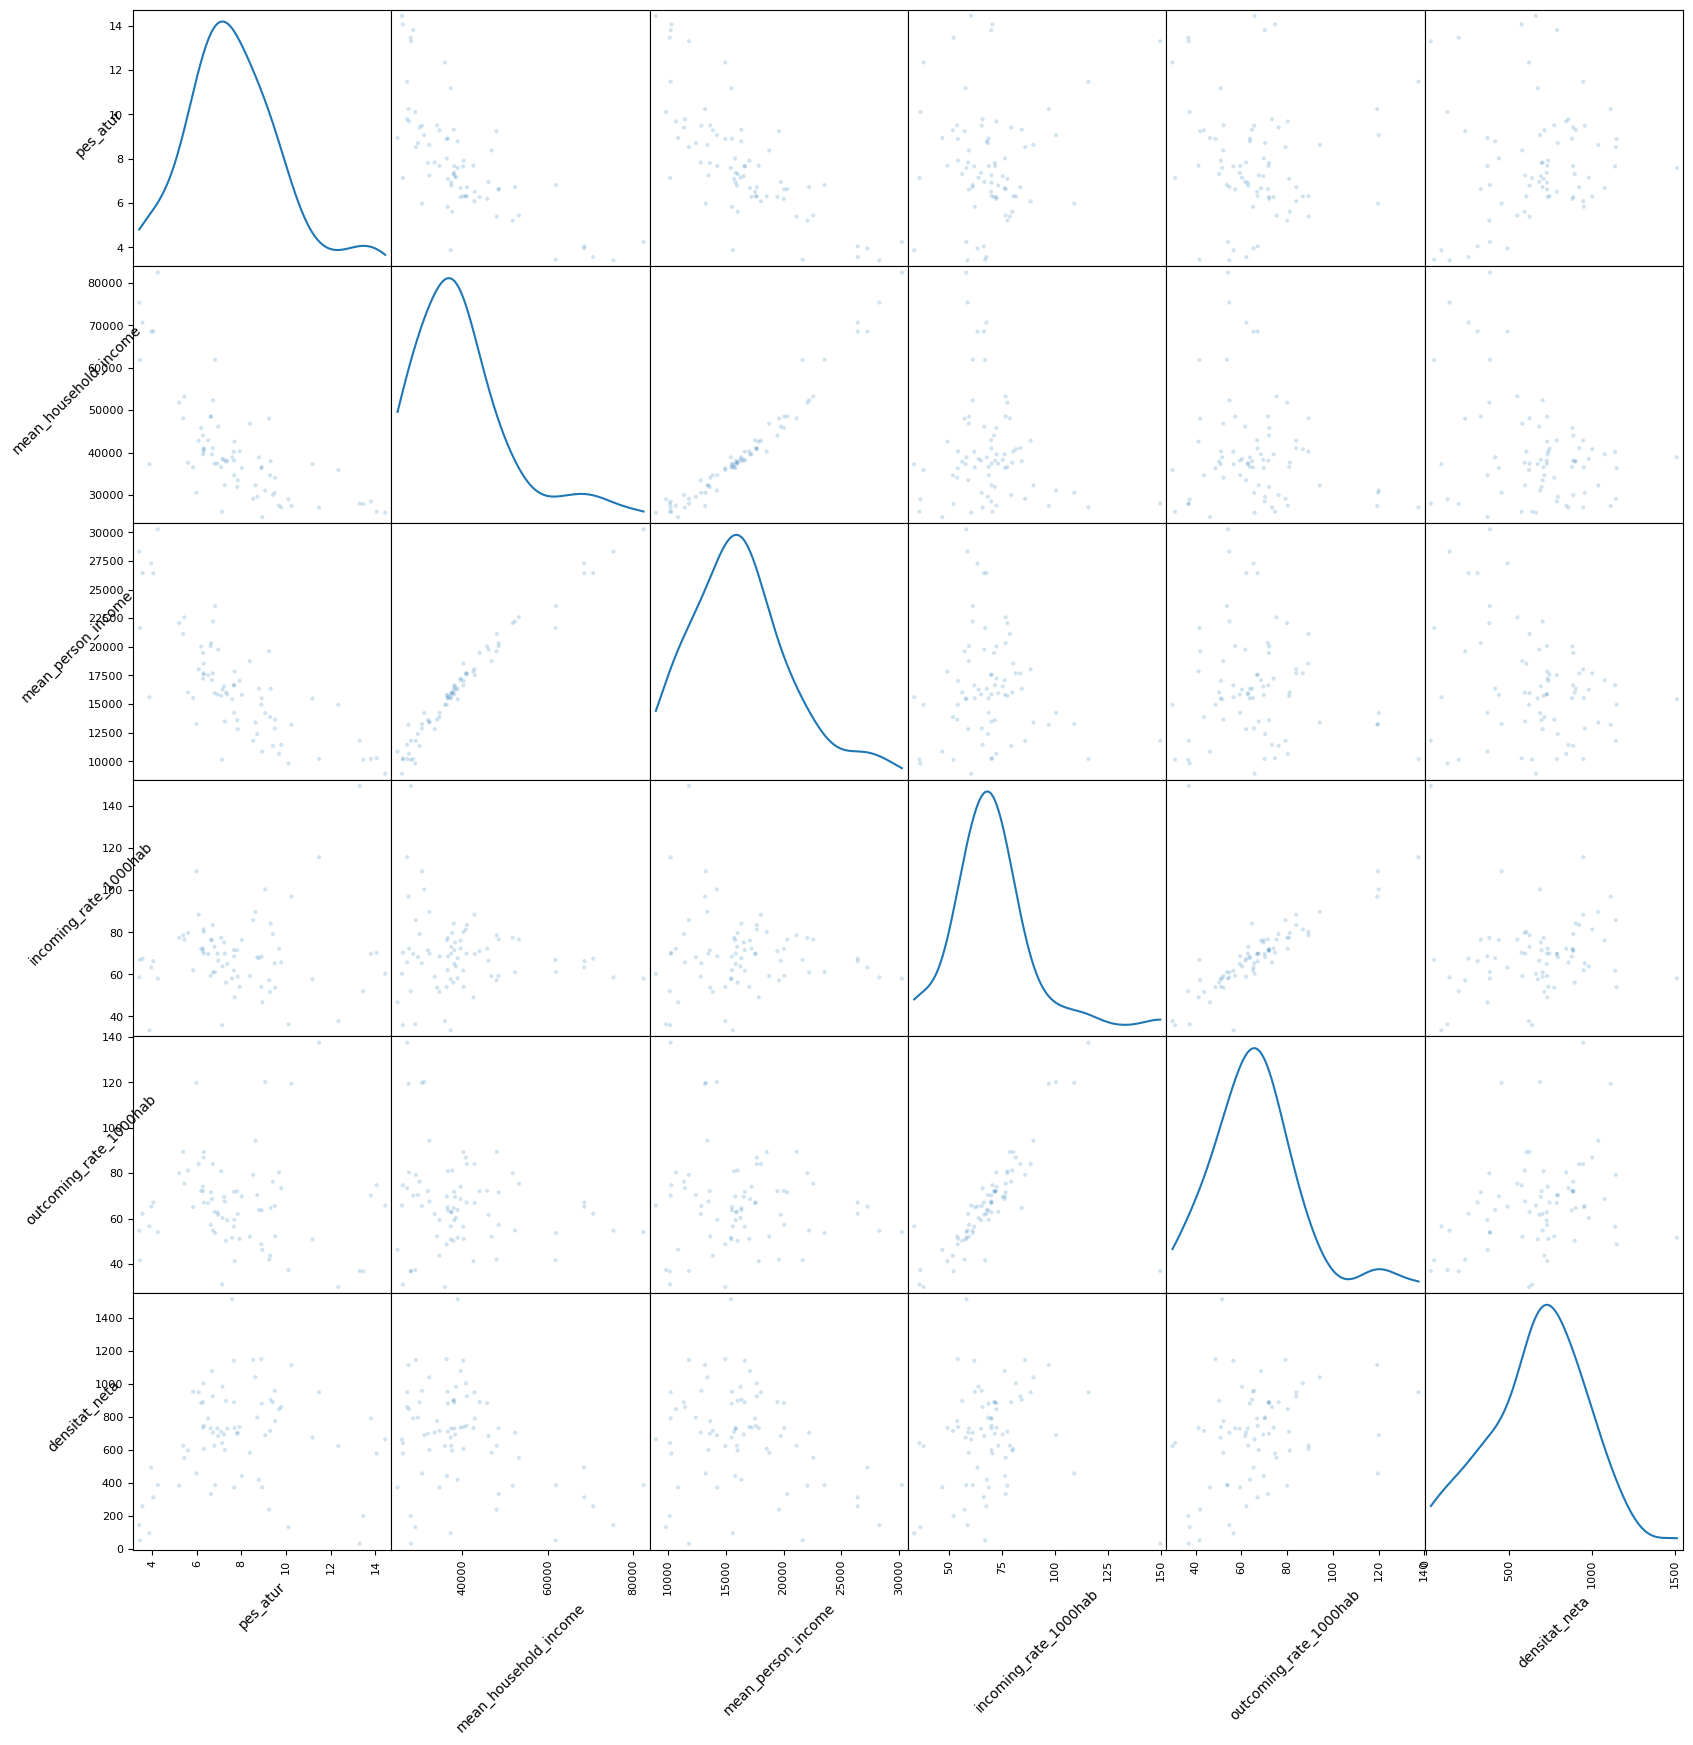

In [168]:
axes = scatter_matrix(full_df[columns_to_skip_normalisation], figsize=(20,20), alpha=0.2, diagonal='kde')
for ax in axes.flatten():
    # Rotate x-axis labels
    ax.xaxis.label.set_rotation(45)
    # Rotate y-axis labels
    ax.yaxis.label.set_rotation(45)

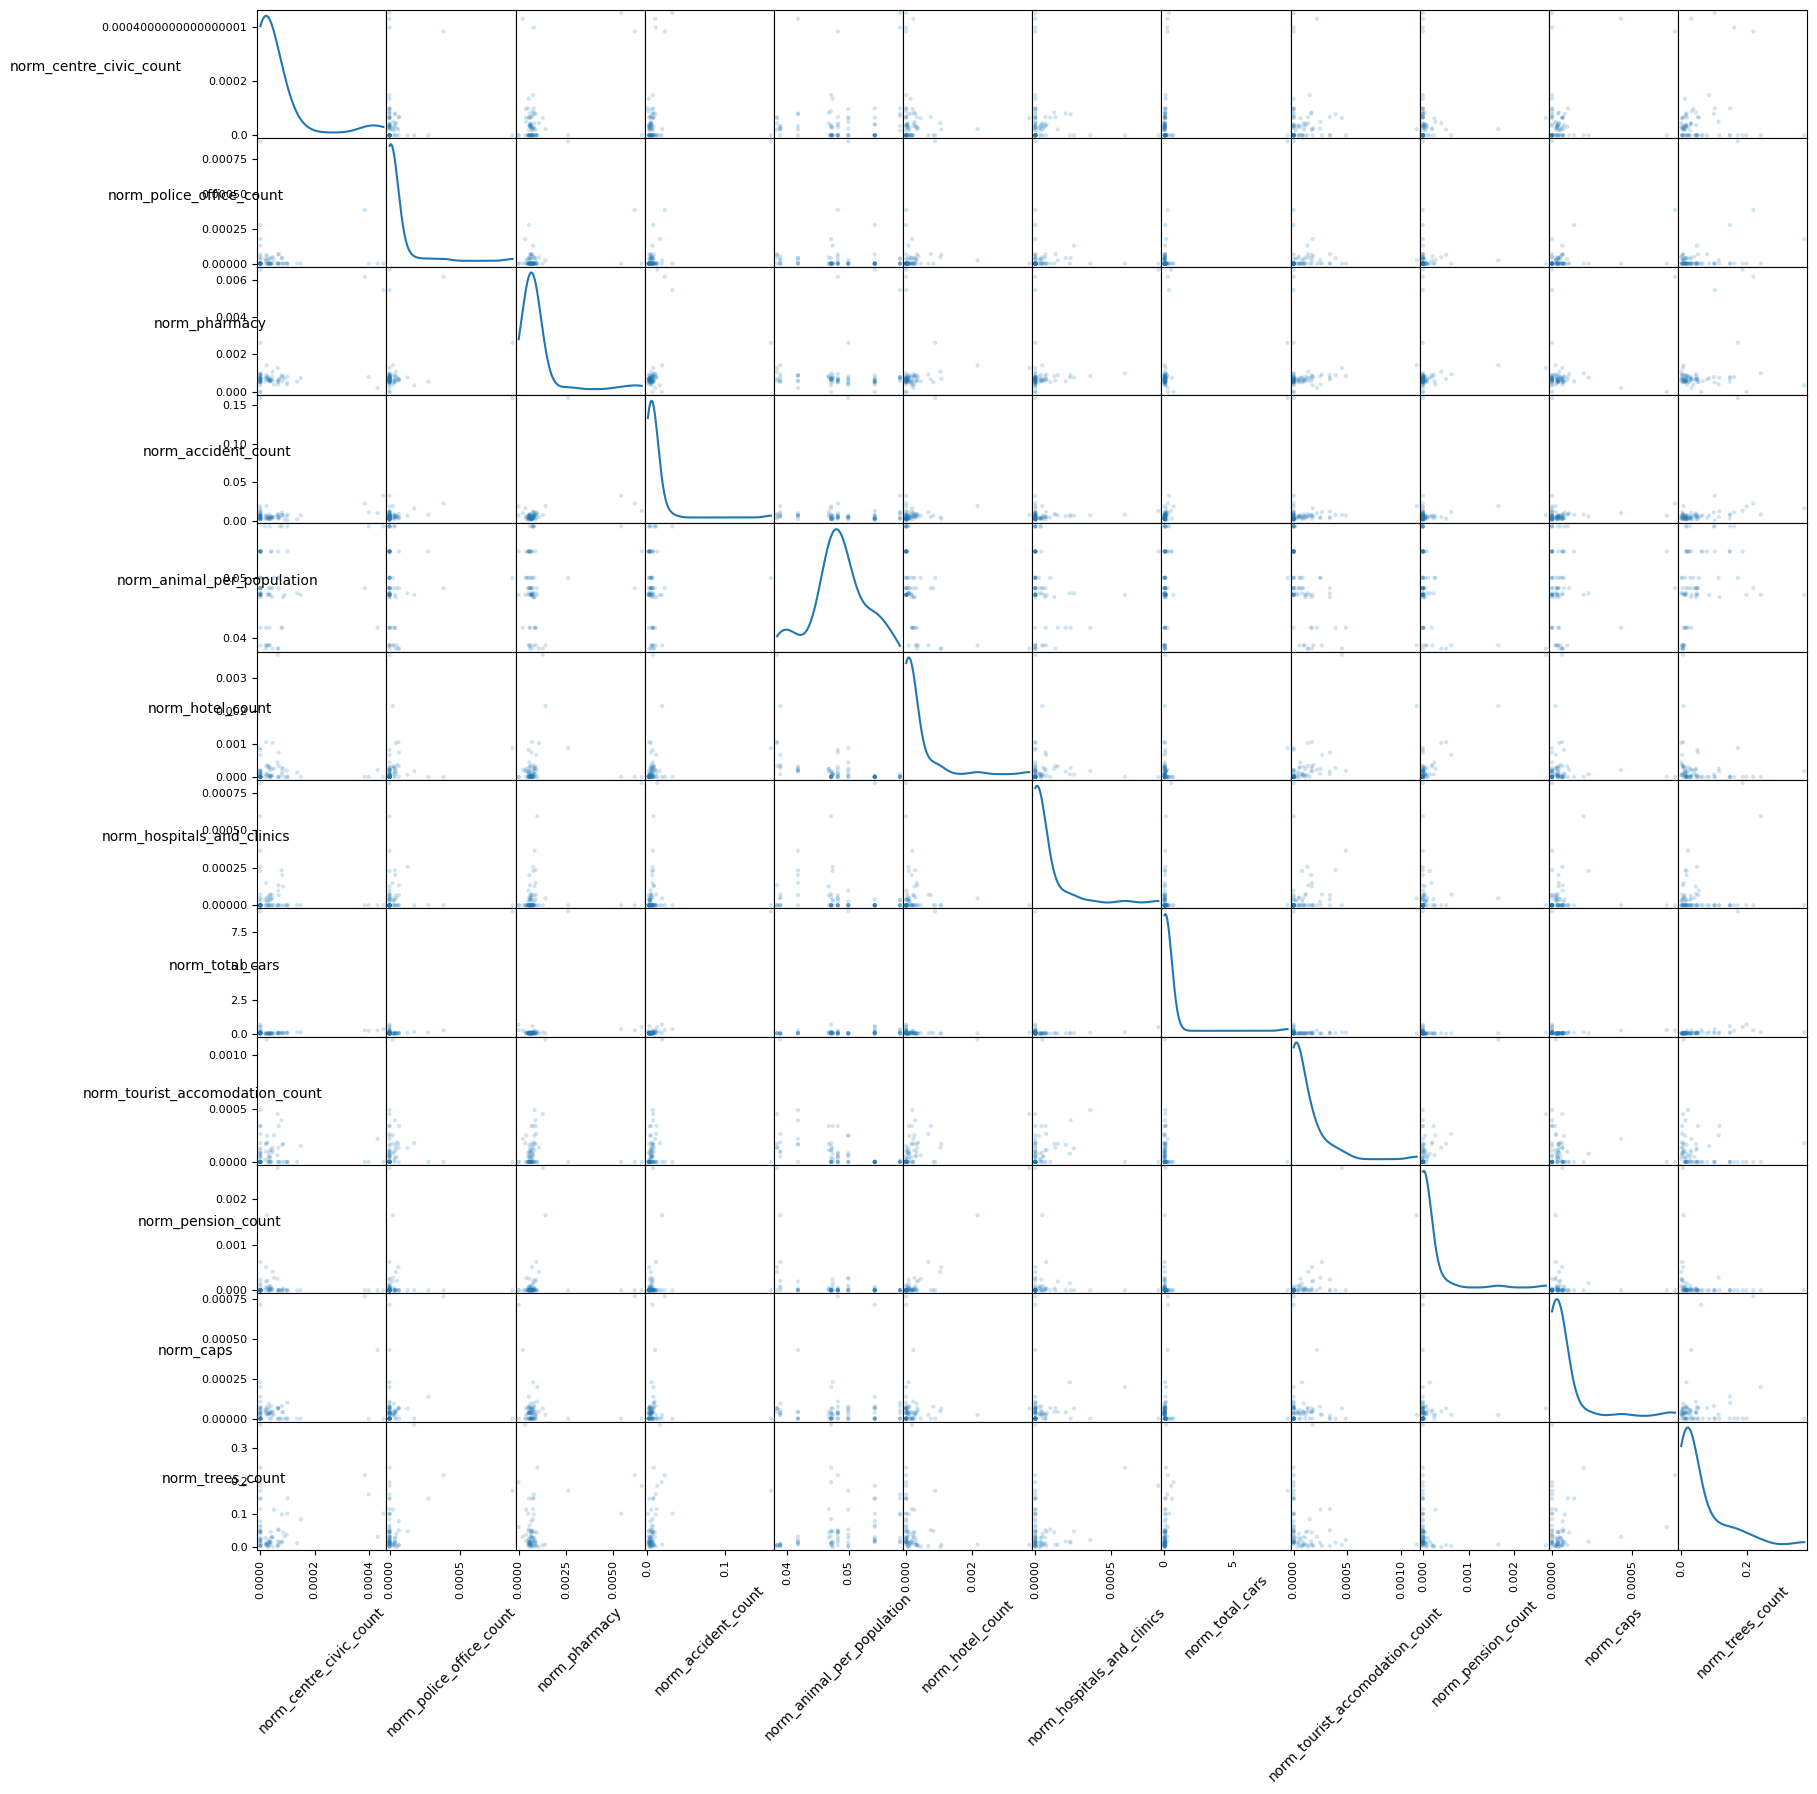

In [169]:
axes = scatter_matrix(full_df[normalised_columns], figsize=(20,20), alpha=0.2, diagonal='kde')
for ax in axes.flatten():
    # Rotate x-axis labels
    ax.xaxis.label.set_rotation(45)
    # Rotate y-axis labels
    ax.yaxis.label.set_rotation(0)

This is not telling us much, because most of our data lies in low values, with some neighborhoods having more extre values. Dimensionality reduction techniques will help us to gain isights into our dataset, which contains many features.

In [170]:
full_df[normalised_columns].corr()

,norm_centre_civic_count,norm_police_office_count,norm_pharmacy,norm_accident_count,norm_animal_per_population,norm_hotel_count,norm_hospitals_and_clinics,norm_total_cars,norm_tourist_accomodation_count,norm_pension_count,norm_caps,norm_trees_count
norm_centre_civic_count,1.000000,0.045742,0.415369,0.080971,0.131076,-0.048040,-0.139114,-0.034374,-0.052425,-0.046588,0.341912,0.182392
norm_police_office_count,0.045742,1.000000,0.333051,0.868284,0.004981,0.113791,-0.061034,0.850221,-0.057312,-0.053737,0.188482,0.389772
norm_pharmacy,0.415369,0.333051,1.000000,0.342497,0.132603,0.041535,0.395569,0.226715,-0.027711,0.042163,0.241333,0.346058
norm_accident_count,0.080971,0.868284,0.342497,1.000000,0.022499,0.176282,-0.014502,0.969857,0.003333,0.008579,0.015001,0.332926
norm_animal_per_population,0.131076,0.004981,0.132603,0.022499,1.000000,-0.471198,-0.098104,0.061086,-0.514077,-0.389488,0.013070,0.309405
norm_hotel_count,-0.048040,0.113791,0.041535,0.176282,-0.471198,1.000000,-0.072156,0.127135,0.610482,0.930097,-0.060117,-0.164731
norm_hospitals_and_clinics,-0.139114,-0.061034,0.395569,-0.014502,-0.098104,-0.072156,1.000000,-0.026051,0.095799,-0.061124,-0.008188,0.212449
norm_total_cars,-0.034374,0.850221,0.226715,0.969857,0.061086,0.127135,-0.026051,1.000000,-0.088805,-0.045541,-0.034197,0.265812
norm_tourist_accomodation_count,-0.052425,-0.057312,-0.027711,0.003333,-0.514077,0.610482,0.095799,-0.088805,1.000000,0.625697,-0.094251,-0.173516
norm_pension_count,-0.046588,-0.053737,0.042163,0.008579,-0.389488,0.930097,-0.061124,-0.045541,0.625697,1.000000,-0.036401,-0.182527


<AxesSubplot:>

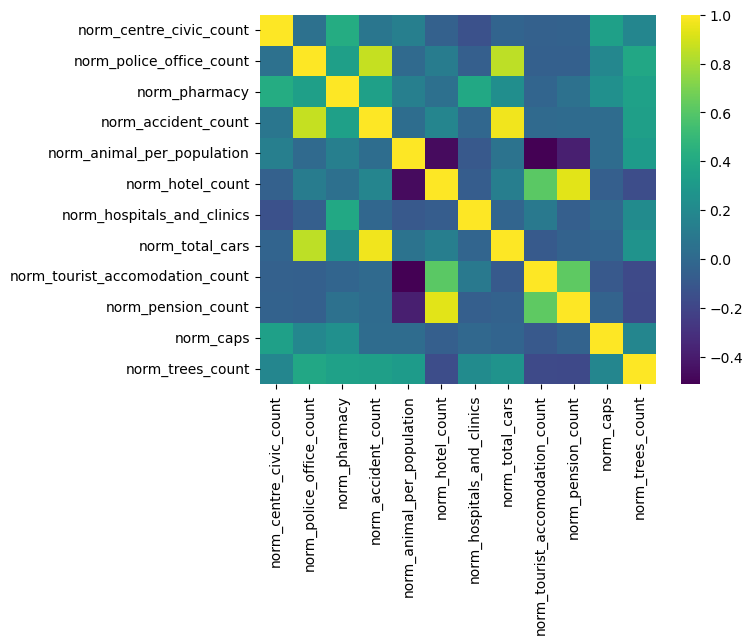

In [171]:
import seaborn as sns

corr = full_df[normalised_columns].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="viridis")

There are some very interesting correlations: Tourists correlate with the number of pharmacies, and accidents. Number of animals has a negative correlation with number of pensions and hotels. Number of cars is correlated with accidents.

In [172]:
full_df[columns_to_skip_normalisation].corr()

,pes_atur,mean_household_income,mean_person_income,incoming_rate_1000hab,outcoming_rate_1000hab,densitat_neta
pes_atur,1.000000,-0.701370,-0.751926,0.104862,-0.056121,0.142413
mean_household_income,-0.701370,1.000000,0.974845,-0.151953,-0.172593,-0.354902
mean_person_income,-0.751926,0.974845,1.000000,-0.092063,-0.096198,-0.282049
incoming_rate_1000hab,0.104862,-0.151953,-0.092063,1.000000,0.668442,0.104179
outcoming_rate_1000hab,-0.056121,-0.172593,-0.096198,0.668442,1.000000,0.320179
densitat_neta,0.142413,-0.354902,-0.282049,0.104179,0.320179,1.000000


<AxesSubplot:>

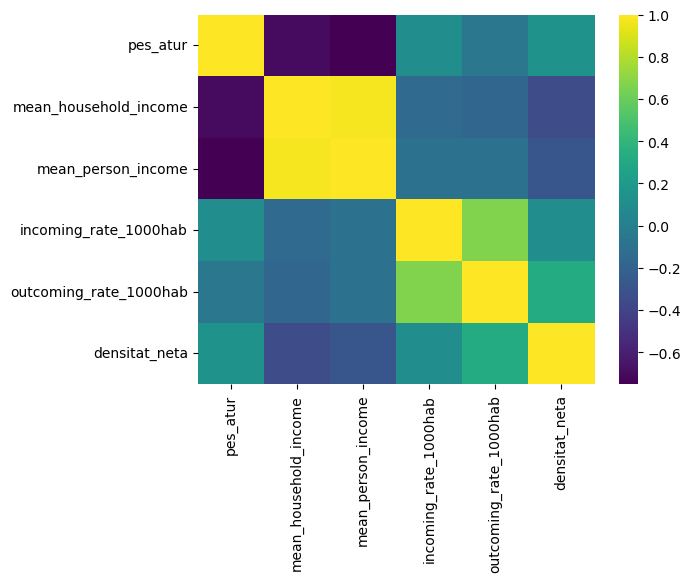

In [173]:
corr=full_df[columns_to_skip_normalisation].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="viridis")

We obsrve many things, to highlight some: were unemployment is low, incomes are high. Neighborhoods with high income migration have also high outcome migrations.

## 5. Discretization methods

The mean household income seems to have a distribution that is not normal. We see several peaks in the distribution:

Text(0, 0.5, 'Frequency')

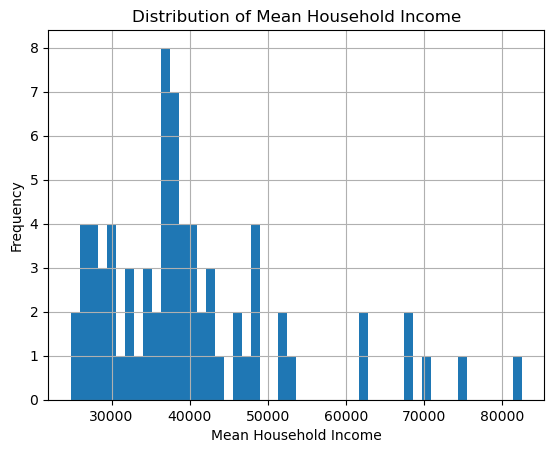

In [174]:
full_df["mean_household_income"].hist(bins=50)
plt.title('Distribution of Mean Household Income')
plt.xlabel('Mean Household Income')
plt.ylabel('Frequency')

Based on this histogram we will create a new create a new variable dividing the household incomes into three categories: low, mean, high:

In [175]:
bins = [-np.inf, 35000, 45000, 60000, np.inf]  # -np.inf and np.inf are used to include all possible values

# Define the labels
labels = ['Low', 'Medium', 'High', 'Very High']

# Categorize the 'Value' column
full_df['mean_household_income_categorical'] = pd.cut(full_df["mean_household_income"], bins=bins, labels=labels)
full_df = full_df.merge(population_df.reset_index()[["codi_barri", "nom_barri"]], right_on="codi_barri", left_on="codi_barri")

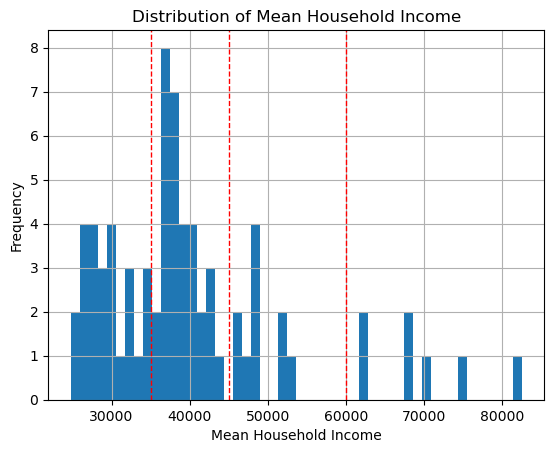

In [176]:
full_df["mean_household_income"].hist(bins=50)
plt.title('Distribution of Mean Household Income')
plt.xlabel('Mean Household Income')
plt.ylabel('Frequency')
for value in bins[1:-1]:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)
    
plt.show()
    

Visualize the results:

In [177]:
print(full_df[['nom_barri', 'mean_household_income_categorical']].to_string(index=False))

                                   nom_barri mean_household_income_categorical
                                    el Raval                               Low
                              el Barri Gòtic                               Low
                              la Barceloneta                               Low
        Sant Pere Santa Caterina I la Ribera                               Low
                               el Fort Pienc                            Medium
                          la Sagrada Família                            Medium
                      la Dreta de l'Eixample                              High
             l'Antiga Esquerra de l'Eixample                              High
              la Nova Esquerra de l'Eixample                              High
                                 Sant Antoni                            Medium
                                el Poble Sec                               Low
                  la Marina del Prat Vermell        

Lastly, we want to have a category of neighborhoods which are by the sea. These are 7 in Barcelona:
11 (El Poblesec), 1 (El Raval), 2 (El Gotic), 3 (la Barceloneta), 67 (La Vila Olimpica i el Poblenou), 68 (el Poblenou), 69 (Diagonal Mar i el Front Maritim del Poblenou), and 70 (el Besos i el Maresme)

In [178]:
full_df["by_sea"]=False

In [179]:
# Set "by_sea" column True to the sea neigborhoods
sea_neighborhoods = [1,2,3,67,68,69,70]
full_df.loc[full_df.index.isin(sea_neighborhoods), 'by_sea'] = True
full_df

,codi_barri,pes_atur,mean_household_income,mean_person_income,incoming_rate_1000hab,outcoming_rate_1000hab,poblacio,densitat_neta,norm_centre_civic_count,norm_police_office_count,...,norm_hotel_count,norm_hospitals_and_clinics,norm_total_cars,norm_tourist_accomodation_count,norm_pension_count,norm_caps,norm_trees_count,mean_household_income_categorical,nom_barri,by_sea
0,1,11.475000,27036.904762,10205.238095,115.7,137.5,47129,948.2,0.000021,0.000064,...,0.001061,0.000000,0.012131,0.000170,0.000509,0.000064,0.006769,Low,el Raval,False
1,2,5.983333,30513.333333,13249.333333,109.0,119.8,15614,457.2,0.000064,0.000000,...,0.003715,0.000000,0.082298,0.000448,0.002690,0.000064,0.006469,Low,el Barri Gòtic,True
2,3,10.241667,27356.727273,13195.181818,97.0,119.4,15021,1113.2,0.000067,0.000067,...,0.000333,0.000133,0.038982,0.000133,0.000000,0.000067,0.006324,Low,la Barceloneta,True
3,4,9.066667,31032.846154,14217.384615,100.4,120.1,22306,688.7,0.000045,0.000045,...,0.001031,0.000000,0.039720,0.000134,0.000403,0.000045,0.001569,Low,Sant Pere Santa Caterina I la Ribera,True
4,5,6.083333,42808.150000,18044.050000,88.4,84.0,31653,947.7,0.000032,0.000032,...,0.000316,0.000000,0.023247,0.000095,0.000000,0.000095,0.006792,Medium,el Fort Pienc,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,8.375000,46815.714286,18755.714286,59.2,52.1,13397,581.9,0.000000,0.000000,...,0.000821,0.000000,0.065377,0.000000,0.000000,0.000075,0.049638,High,Diagonal Mar i el Front Marítim del Poblenou,True
69,70,9.408333,29956.153846,11355.692308,79.2,76.3,22746,887.8,0.000044,0.000000,...,0.000044,0.000044,0.029807,0.000088,0.000000,0.000044,0.030775,Low,el Besòs i el Maresme,True
70,71,7.583333,38873.583333,15427.500000,58.1,51.6,20369,1510.9,0.000000,0.000049,...,0.000098,0.000049,0.044332,0.000049,0.000000,0.000000,0.040994,Medium,Provençals del Poblenou,True
71,72,8.891667,36274.222222,14948.166667,54.0,48.7,2601,1148.6,0.000384,0.000384,...,0.000000,0.000000,0.249626,0.000000,0.000000,0.000769,0.217993,Medium,Sant Martí de Provençals,False


In [180]:
# We save the resulting dataset
full_df.to_csv("data/preprocessed/full_data_processed.csv", index=False)

## 6. Dimensionality Reduction

Before doing any further analysis, we need to treat the newly created categorical variable, one way to do it is with one hot encodding.

In [181]:
### One hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)


In [182]:
encoded_data = encoder.fit_transform(full_df[['mean_household_income_categorical']])

In [183]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
encoded_df

,mean_household_income_categorical_High,mean_household_income_categorical_Low,mean_household_income_categorical_Medium,mean_household_income_categorical_Very High
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
68,1.0,0.0,0.0,0.0
69,0.0,1.0,0.0,0.0
70,0.0,0.0,1.0,0.0
71,0.0,0.0,1.0,0.0


In [184]:
# We add the categorical one hot encoded
full_df = full_df.merge(encoded_df, right_index=True, left_index=True)
full_df #check the last columns of the dataframe

,codi_barri,pes_atur,mean_household_income,mean_person_income,incoming_rate_1000hab,outcoming_rate_1000hab,poblacio,densitat_neta,norm_centre_civic_count,norm_police_office_count,...,norm_pension_count,norm_caps,norm_trees_count,mean_household_income_categorical,nom_barri,by_sea,mean_household_income_categorical_High,mean_household_income_categorical_Low,mean_household_income_categorical_Medium,mean_household_income_categorical_Very High
0,1,11.475000,27036.904762,10205.238095,115.7,137.5,47129,948.2,0.000021,0.000064,...,0.000509,0.000064,0.006769,Low,el Raval,False,0.0,1.0,0.0,0.0
1,2,5.983333,30513.333333,13249.333333,109.0,119.8,15614,457.2,0.000064,0.000000,...,0.002690,0.000064,0.006469,Low,el Barri Gòtic,True,0.0,1.0,0.0,0.0
2,3,10.241667,27356.727273,13195.181818,97.0,119.4,15021,1113.2,0.000067,0.000067,...,0.000000,0.000067,0.006324,Low,la Barceloneta,True,0.0,1.0,0.0,0.0
3,4,9.066667,31032.846154,14217.384615,100.4,120.1,22306,688.7,0.000045,0.000045,...,0.000403,0.000045,0.001569,Low,Sant Pere Santa Caterina I la Ribera,True,0.0,1.0,0.0,0.0
4,5,6.083333,42808.150000,18044.050000,88.4,84.0,31653,947.7,0.000032,0.000032,...,0.000000,0.000095,0.006792,Medium,el Fort Pienc,False,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,8.375000,46815.714286,18755.714286,59.2,52.1,13397,581.9,0.000000,0.000000,...,0.000000,0.000075,0.049638,High,Diagonal Mar i el Front Marítim del Poblenou,True,1.0,0.0,0.0,0.0
69,70,9.408333,29956.153846,11355.692308,79.2,76.3,22746,887.8,0.000044,0.000000,...,0.000000,0.000044,0.030775,Low,el Besòs i el Maresme,True,0.0,1.0,0.0,0.0
70,71,7.583333,38873.583333,15427.500000,58.1,51.6,20369,1510.9,0.000000,0.000049,...,0.000000,0.000000,0.040994,Medium,Provençals del Poblenou,True,0.0,0.0,1.0,0.0
71,72,8.891667,36274.222222,14948.166667,54.0,48.7,2601,1148.6,0.000384,0.000384,...,0.000000,0.000769,0.217993,Medium,Sant Martí de Provençals,False,0.0,0.0,1.0,0.0


We keep the full dataframe with the labels in a copy, and we remove unnecessary columns of the full df for the Pipeline

In [185]:
full_df_labeled = full_df.copy()

In [186]:
# We drop the numerical mean household income
full_df.drop(columns="mean_household_income", inplace=True)

# We drop the categorical mean household income
full_df.drop(columns="mean_household_income_categorical", inplace=True)

In [187]:
if "nom_barri" in full_df.columns:
    full_df.drop(columns="nom_barri", inplace=True)

In [188]:
if "codi_barri" in full_df.columns:
    full_df.drop(columns="codi_barri", inplace=True)

In [189]:
if "poblacio" in full_df.columns:
    full_df.drop(columns="poblacio", inplace=True)

Now we need to scale our values, so that values that have higher magnitudes are not considered more important for the following algorithms. This can be done with the StandarScaler.

In [190]:
### Scaling

In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_full = scaler.fit_transform(full_df)

In [192]:
scaled_full_df = pd.DataFrame(scaled_full, columns= full_df.columns)
scaled_full_df

,pes_atur,mean_person_income,incoming_rate_1000hab,outcoming_rate_1000hab,densitat_neta,norm_centre_civic_count,norm_police_office_count,norm_pharmacy,norm_accident_count,norm_animal_per_population,...,norm_total_cars,norm_tourist_accomodation_count,norm_pension_count,norm_caps,norm_trees_count,by_sea,mean_household_income_categorical_High,mean_household_income_categorical_Low,mean_household_income_categorical_Medium,mean_household_income_categorical_Very High
0,1.485426,-1.371186,2.631561,3.580608,0.929637,-0.335399,0.240959,-0.197159,-0.317551,-1.741282,...,-0.187802,0.412755,1.069365,0.003846,-0.694893,-0.325669,-0.39841,1.385641,-0.859125,-0.325669
1,-0.743014,-0.704919,2.251584,2.688064,-0.765328,0.117164,-0.308347,0.326251,-0.056415,-1.741282,...,-0.120513,2.052712,6.887685,0.006840,-0.699296,3.070598,-0.39841,1.385641,-0.859125,-0.325669
2,0.984957,-0.716771,1.571028,2.667893,1.499228,0.143882,0.266143,-0.288236,0.014242,-1.741282,...,-0.162052,0.197288,-0.289367,0.026253,-0.701410,3.070598,-0.39841,1.385641,-0.859125,-0.325669
3,0.508159,-0.493040,1.763852,2.703192,0.033826,-0.085877,0.078518,0.141512,-0.211477,-1.741282,...,-0.161344,0.205212,0.787177,-0.140682,-0.771185,3.070598,-0.39841,1.385641,-0.859125,-0.325669
4,-0.702435,0.344510,1.083296,0.882805,0.927911,-0.225771,-0.035722,-0.258770,-0.014139,-1.650277,...,-0.177141,-0.028595,-0.289367,0.242800,-0.694544,-0.325669,-0.39841,-0.721688,1.163975,-0.325669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.227490,0.500274,-0.572724,-0.725792,-0.334855,-0.559620,-0.308347,-0.357330,-0.092072,-0.016873,...,-0.136740,-0.586559,-0.289367,0.088214,-0.065880,3.070598,2.50998,-0.721688,-0.859125,-0.325669
69,0.646802,-1.119384,0.561536,0.494523,0.721132,-0.095041,-0.308347,-0.273515,-0.249933,-0.016873,...,-0.170850,-0.068922,-0.289367,-0.147340,-0.342658,3.070598,-0.39841,1.385641,-0.859125,-0.325669
70,-0.093757,-0.228179,-0.635108,-0.751006,2.872115,-0.559620,0.115307,-0.253026,-0.087922,-0.016873,...,-0.156922,-0.297538,-0.289367,-0.484886,-0.192716,3.070598,-0.39841,-0.721688,1.163975,-0.325669
71,0.437146,-0.333092,-0.867631,-0.897242,1.621431,3.503163,3.009385,4.716344,0.752457,-0.016873,...,0.039952,-0.586559,-0.289367,5.418853,2.404359,-0.325669,-0.39841,-0.721688,1.163975,-0.325669


Now all should have mean zero and the same standard deviation=1.

In [193]:
scaled_full_df.describe()

,pes_atur,mean_person_income,incoming_rate_1000hab,outcoming_rate_1000hab,densitat_neta,norm_centre_civic_count,norm_police_office_count,norm_pharmacy,norm_accident_count,norm_animal_per_population,...,norm_total_cars,norm_tourist_accomodation_count,norm_pension_count,norm_caps,norm_trees_count,by_sea,mean_household_income_categorical_High,mean_household_income_categorical_Low,mean_household_income_categorical_Medium,mean_household_income_categorical_Very High
count,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,...,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01
mean,9.992007e-16,7.452182e-17,-1.551271e-16,-3.650048e-17,-2.345916e-16,-2.889622e-17,3.878176e-17,-7.376139e-17,8.212609e-17,-1.413443e-15,...,-4.296411e-17,-3.497963e-17,-1.901067e-17,1.026576e-17,-3.612027e-17,1.520853e-17,-3.497963e-17,1.216683e-17,4.866731e-17,6.995926e-17
std,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,...,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00,1.006920e+00
min,-1.784530e+00,-1.652160e+00,-2.035919e+00,-1.845255e+00,-2.233837e+00,-5.596195e-01,-3.083473e-01,-8.282891e-01,-4.275995e-01,-1.741282e+00,...,-1.878810e-01,-5.865593e-01,-2.893673e-01,-4.848858e-01,-7.800638e-01,-3.256695e-01,-3.984095e-01,-7.216878e-01,-8.591247e-01,-3.256695e-01
25%,-6.111336e-01,-6.734377e-01,-5.727237e-01,-6.249400e-01,-6.427795e-01,-5.596195e-01,-3.083473e-01,-3.194423e-01,-2.989481e-01,-2.748718e-01,...,-1.774400e-01,-5.865593e-01,-2.893673e-01,-4.848858e-01,-6.178424e-01,-3.256695e-01,-3.984095e-01,-7.216878e-01,-8.591247e-01,-3.256695e-01
50%,-1.816771e-01,-1.117237e-01,-4.529271e-02,-6.016610e-02,8.664215e-02,-2.671882e-01,-3.083473e-01,-2.208290e-01,-1.698563e-01,-1.687279e-02,...,-1.598933e-01,-3.676923e-01,-2.893673e-01,-2.168525e-01,-3.815896e-01,-3.256695e-01,-3.984095e-01,-7.216878e-01,-8.591247e-01,-3.256695e-01
75%,5.081585e-01,4.529867e-01,4.140826e-01,3.835848e-01,7.176799e-01,1.281764e-01,-3.572153e-02,-1.092230e-01,-4.326324e-02,1.030287e+00,...,-1.152714e-01,2.052120e-01,-1.774856e-01,7.565777e-03,1.047703e-01,-3.256695e-01,-3.984095e-01,1.385641e+00,1.163975e+00,-3.256695e-01
max,2.689256e+00,3.020487e+00,4.554132e+00,3.580608e+00,2.872115e+00,4.226294e+00,7.241453e+00,5.053273e+00,8.148185e+00,1.747097e+00,...,8.427219e+00,6.157877e+00,6.887685e+00,5.418853e+00,4.653253e+00,3.070598e+00,2.509980e+00,1.385641e+00,1.163975e+00,3.070598e+00


### 6.1 PCA

In [194]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_results = pca.fit_transform(scaled_full_df)


In [195]:
labels = [f"PC{i}" for i in range(1,11)]
principal_df = pd.DataFrame(data = pca_results, columns = labels) #, columns.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

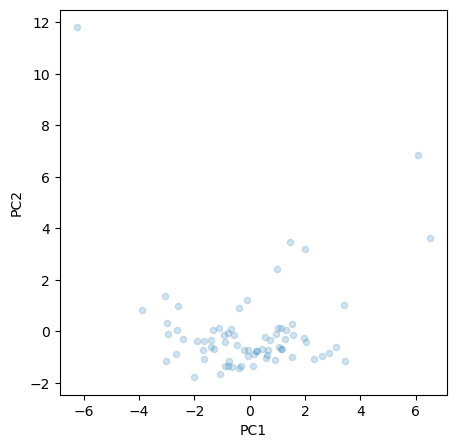

In [196]:
principal_df.plot.scatter(x="PC1", y="PC2", alpha=.2, figsize=(5,5))

<AxesSubplot:xlabel='PC2', ylabel='PC3'>

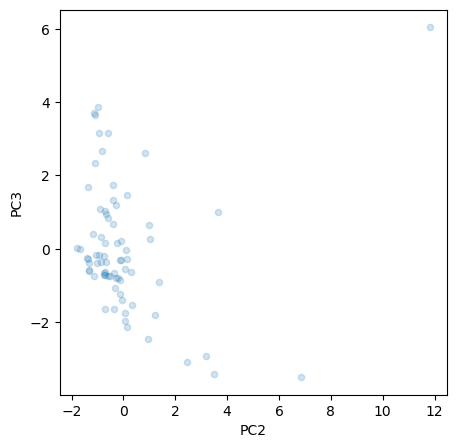

In [197]:
principal_df.plot.scatter(x="PC2", y="PC3", alpha=.2, figsize=(5,5))

In [198]:
population_df

,nom_barri,poblacio,superficie,superficie_residencial,densitat,densitat_neta
codi_barri,,,,,,
1,el Raval,47129,109.8,49.7,429.1,948.2
2,el Barri Gòtic,15614,84.2,34.1,185.4,457.2
3,la Barceloneta,15021,131.4,13.5,114.3,1113.2
4,Sant Pere Santa Caterina I la Ribera,22306,111.4,32.4,200.2,688.7
5,el Fort Pienc,31653,92.9,33.4,340.8,947.7
...,...,...,...,...,...,...
69,Diagonal Mar i el Front Marítim del Poblenou,13397,123.7,23.0,108.3,581.9
70,el Besòs i el Maresme,22746,127.4,25.6,178.5,887.8
71,Provençals del Poblenou,20369,110.5,13.5,184.3,1510.9


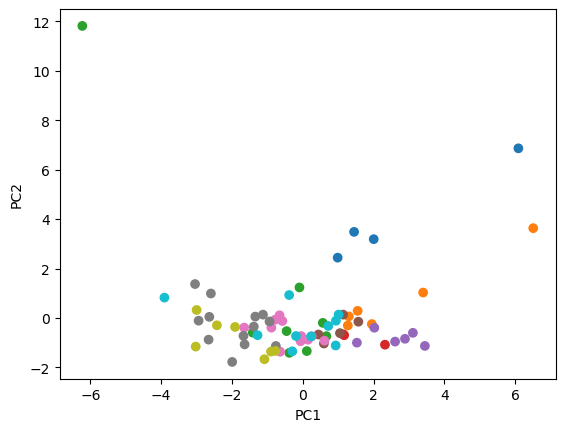

Text(0, 0.5, 'PC3')

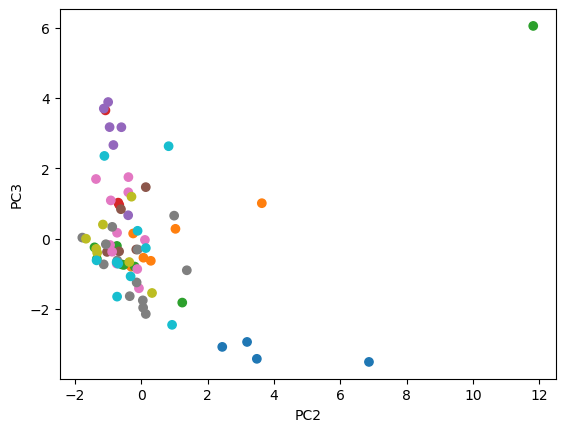

In [199]:
plt.scatter(x=principal_df["PC1"], y=principal_df["PC2"], c=df_ids["codi_districte"], cmap="tab10")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
plt.scatter(x=principal_df["PC2"], y=principal_df["PC3"], c=df_ids["codi_districte"], cmap="tab10")
plt.xlabel("PC2")
plt.ylabel("PC3")

Podem veure que en certa manera els barris del mateix districte tendeixen a estar relativament mes aprop que els altres, en aquesta visualitzacio fent servir PCA i els PC1 vs PC2 i PC2 vs PC3.

Ara mirem la varianca que podem explicar segons el nombre de components del PCA.

Text(0, 0.5, 'Variance explained')

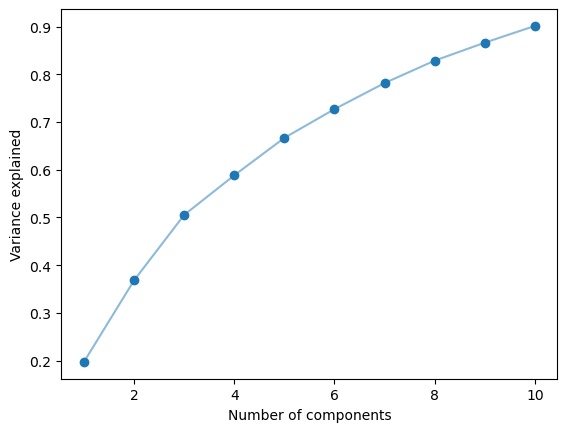

In [200]:
plt.plot(np.arange(1, len(pca.components_)+1), pca.explained_variance_ratio_.cumsum(), alpha=.5)
plt.scatter(np.arange(1, len(pca.components_)+1), pca.explained_variance_ratio_.cumsum())
plt.xlabel("Number of components")
plt.ylabel("Variance explained")

In [201]:
loadings = pd.DataFrame(pca.components_.T, index=scaled_full_df.columns)

In [202]:
loadings

,0,1,2,3,4,5,6,7,8,9
pes_atur,-0.330205,0.153791,-0.215101,0.144050,-0.093816,0.077173,0.098438,-0.013414,0.070477,0.139940
mean_person_income,0.322905,-0.132209,0.358003,-0.094575,-0.057624,0.063042,-0.056529,-0.079548,0.033481,-0.090384
incoming_rate_1000hab,0.095338,0.404089,-0.092399,-0.228773,-0.093444,0.105676,-0.246964,-0.136643,-0.170338,0.114310
outcoming_rate_1000hab,0.231517,0.196445,-0.327386,-0.097948,0.093881,0.190048,-0.242455,-0.053026,-0.139190,0.217746
densitat_neta,-0.053170,-0.071128,-0.341536,-0.368583,0.193480,0.164789,-0.044662,-0.185963,-0.065648,-0.125184
norm_centre_civic_count,-0.086731,-0.019687,0.105245,0.019585,0.514026,-0.324221,-0.129365,-0.208994,-0.330895,-0.313623
norm_police_office_count,-0.195505,0.354172,0.240660,-0.180924,-0.053333,-0.041383,0.007656,-0.122698,0.096666,0.110373
norm_pharmacy,-0.128288,0.135206,0.145925,-0.101217,0.526140,0.297061,0.057440,-0.002118,-0.166463,-0.182643
norm_accident_count,-0.165011,0.371645,0.289868,-0.153189,-0.103788,-0.041143,0.007330,-0.021805,-0.032421,-0.128704
norm_animal_per_population,-0.359915,-0.141042,-0.051764,0.085152,-0.009656,-0.061813,0.127941,0.223953,-0.170831,-0.218933


With this plot we can see which features contribute to which principal components.

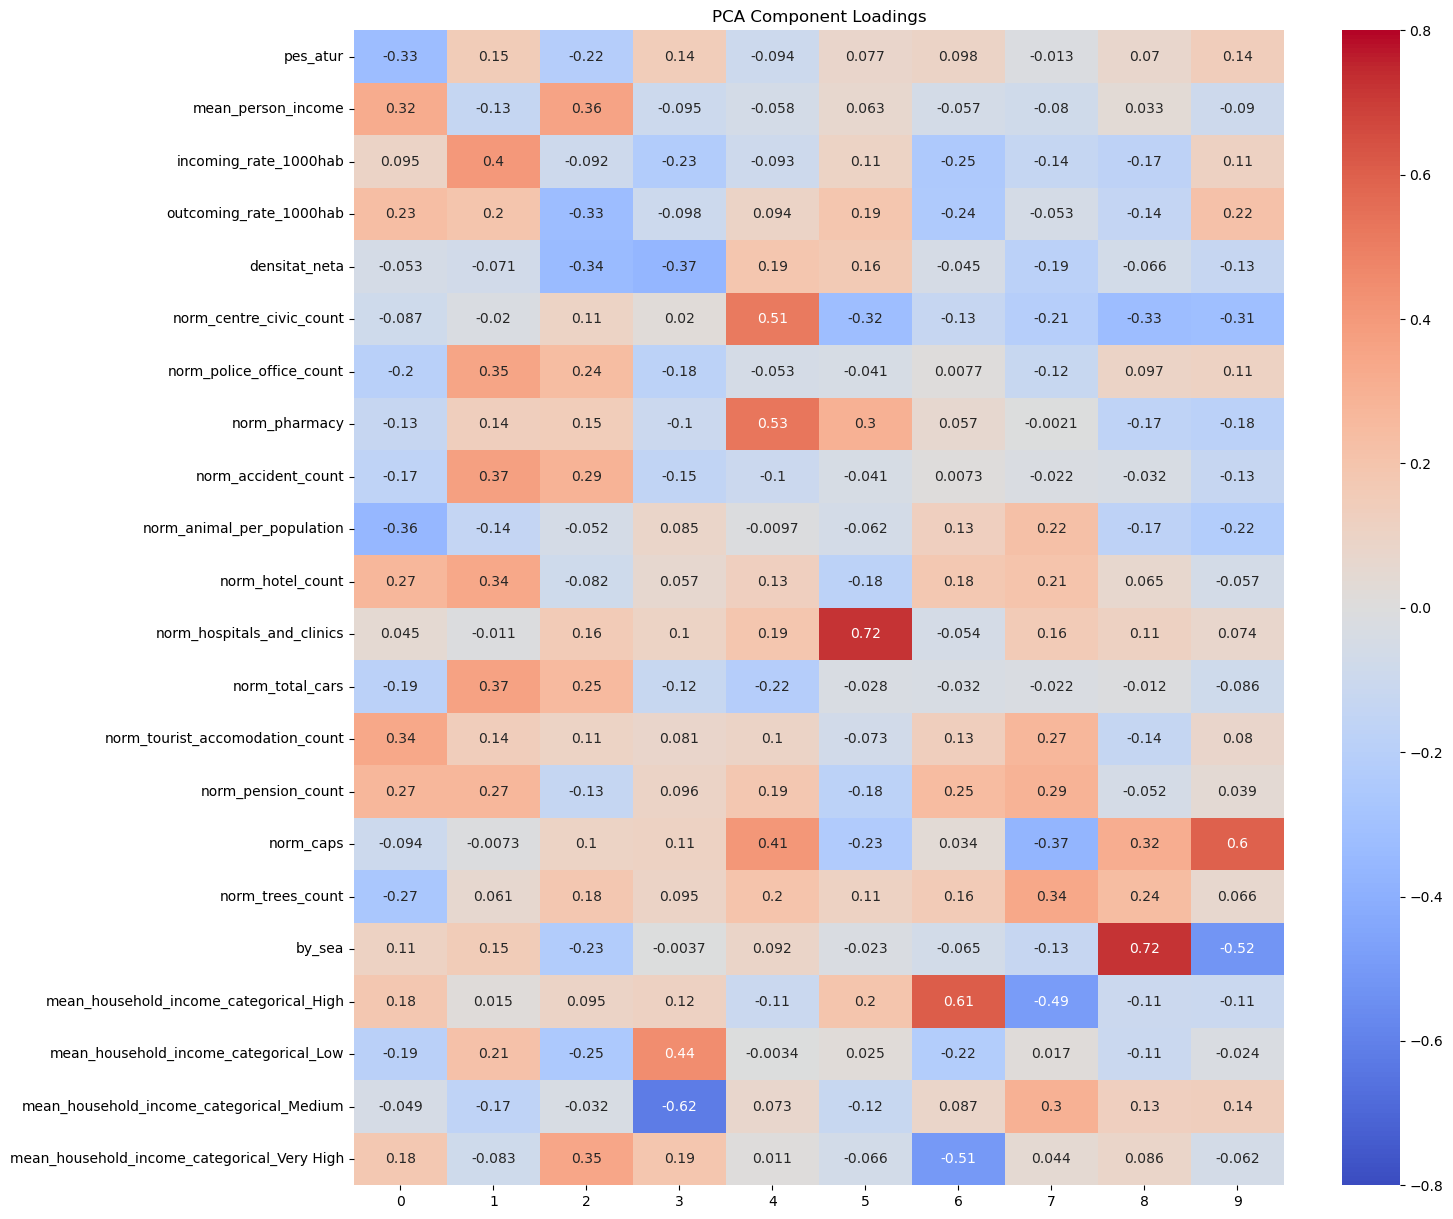

In [203]:
plt.figure(figsize=(15, 15))
sns.heatmap(loadings, annot=True, cmap='coolwarm', vmin=-0.8, vmax=0.8)
plt.title('PCA Component Loadings')
plt.show()

In [204]:
for i in range(0, 3):
    print (f"\nSorted Loadings of PC{i+1}")
    print(loadings[i].sort_values(ascending=False))
    print("\n")


Sorted Loadings of PC1
norm_tourist_accomodation_count                0.343658
mean_person_income                             0.322905
norm_pension_count                             0.274843
norm_hotel_count                               0.271354
outcoming_rate_1000hab                         0.231517
mean_household_income_categorical_High         0.183461
mean_household_income_categorical_Very High    0.180291
by_sea                                         0.109650
incoming_rate_1000hab                          0.095338
norm_hospitals_and_clinics                     0.044941
mean_household_income_categorical_Medium      -0.049113
densitat_neta                                 -0.053170
norm_centre_civic_count                       -0.086731
norm_caps                                     -0.093953
norm_pharmacy                                 -0.128288
norm_accident_count                           -0.165011
norm_total_cars                               -0.187481
mean_household_income_ca

In [205]:
full_df_labeled.iloc[principal_df['PC1'].idxmax()]

codi_barri                                                          7
pes_atur                                                     5.208333
mean_household_income                                    51776.827586
mean_person_income                                       22071.758621
incoming_rate_1000hab                                            77.4
outcoming_rate_1000hab                                           80.0
poblacio                                                        43644
densitat_neta                                                   383.2
norm_centre_civic_count                                      0.000023
norm_police_office_count                                     0.000023
norm_pharmacy                                                0.001421
norm_accident_count                                          0.019247
norm_animal_per_population                                   0.038838
norm_hotel_count                                             0.002154
norm_hospitals_and_c

In [214]:
combined_df = full_df_labeled.join(principal_df)
combined_df.sort_values(by='PC1', ascending=False)[0:5][["nom_barri", "PC1"]]

,nom_barri,PC1
6,la Dreta de l'Eixample,6.507899
1,el Barri Gòtic,6.088525
23,les Tres Torres,3.448683
7,l'Antiga Esquerra de l'Eixample,3.398903
24,Sant Gervasi - la Bonanova,3.110122


In [215]:
combined_df.sort_values(by='PC1', ascending=False)[0:5]

,codi_barri,pes_atur,mean_household_income,mean_person_income,incoming_rate_1000hab,outcoming_rate_1000hab,poblacio,densitat_neta,norm_centre_civic_count,norm_police_office_count,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
6,7,5.208333,51776.827586,22071.758621,77.4,80.0,43644,383.2,0.000023,0.000023,...,6.507899,3.632852,1.007104,1.133099,1.130569,-0.921268,3.628433,1.730931,-1.503679,0.407230
1,2,5.983333,30513.333333,13249.333333,109.0,119.8,15614,457.2,0.000064,0.000000,...,6.088525,6.862022,-3.505037,1.483944,2.675643,-2.177092,0.980473,2.547017,0.936226,-0.529994
23,24,4.250000,82453.727273,30270.272727,58.0,54.1,16473,386.9,0.000000,0.000000,...,3.448683,-1.129101,3.697535,1.119516,-0.187799,1.462487,-1.732444,0.999755,0.365327,-0.177796
7,8,5.391667,48039.307692,21124.961538,78.6,89.4,41854,625.2,0.000000,0.000000,...,3.398903,1.029874,0.278041,0.106583,-0.331458,0.767910,1.592016,-1.133310,-0.807116,0.284876
24,25,4.050000,68573.777778,26432.333333,66.3,67.1,25665,312.7,0.000078,0.000039,...,3.110122,-0.599740,3.166882,0.910142,0.020732,0.544878,-2.064490,0.487087,-0.123550,-0.251341


In [208]:
combined_df.sort_values(by='PC2', ascending=False)[0:5][["nom_barri", "PC1", "PC2"]]

,nom_barri,PC1,PC2
11,la Marina del Prat Vermell,-6.224323,11.812214
1,el Barri Gòtic,6.088525,6.862022
6,la Dreta de l'Eixample,6.507899,3.632852
0,el Raval,1.449394,3.483028
3,Sant Pere Santa Caterina I la Ribera,2.003760,3.188242


### 6.2 SVD

PCA is based on SVD, which we can do using the scipy library:

In [209]:
from scipy.linalg import svd


U, s, VT = svd(scaled_full_df)

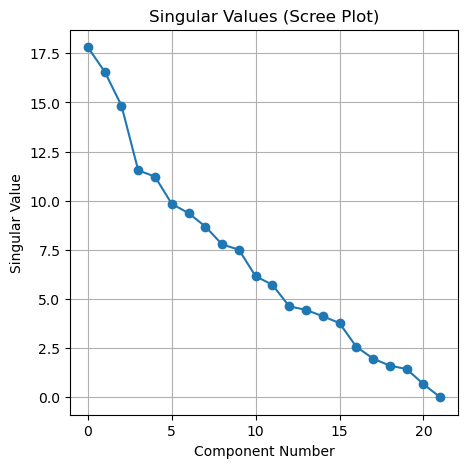

In [210]:
plt.figure(figsize=(5, 5))
plt.plot(s, marker='o')
plt.title('Singular Values (Scree Plot)')
plt.xlabel('Component Number')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()


We can now regenerate with little error, our original dataset using only three components. As a matter of fact we are able to reduce the dimenions of our dataset from 28, to 3 and we are able to explain around 60% of the variance:

In [211]:
# Number of components to keep
num_components = 3

# Construct the reduced matrices
U_reduced = U[:, :num_components]
s_reduced = np.diag(s[:num_components])
VT_reduced = VT[:num_components, :]

# Reconstruct the approximated matrix
data_approx = np.dot(np.dot(U_reduced, s_reduced), VT_reduced)

# Convert back to DataFrame for usability
data_approx_df = pd.DataFrame(data_approx, columns=scaled_full_df.columns)


In [212]:
data_approx_df

,pes_atur,mean_person_income,incoming_rate_1000hab,outcoming_rate_1000hab,densitat_neta,norm_centre_civic_count,norm_police_office_count,norm_pharmacy,norm_accident_count,norm_animal_per_population,...,norm_total_cars,norm_tourist_accomodation_count,norm_pension_count,norm_caps,norm_trees_count,by_sea,mean_household_income_categorical_High,mean_household_income_categorical_Low,mean_household_income_categorical_Medium,mean_household_income_categorical_Very High
0,0.792031,-1.215713,1.861352,2.138410,0.842173,-0.553885,0.127928,-0.213618,0.064847,-0.836045,...,0.139114,0.619653,1.790092,-0.510648,-0.801139,1.486657,-0.006904,1.323564,-0.540423,-1.217822
1,-0.201203,-0.196018,3.677201,3.905106,0.385289,-1.032046,0.396476,-0.364771,0.529562,-2.977754,...,0.482040,2.671193,3.986162,-0.980302,-1.846745,2.538858,0.886244,1.169025,-1.325986,-0.692973
2,0.711701,-1.106033,1.364526,1.715285,0.825118,-0.457479,-0.069138,-0.245657,-0.147872,-0.539804,...,-0.069498,0.352157,1.337071,-0.424834,-0.678951,1.196157,-0.075218,1.105208,-0.355489,-1.096594
3,0.460427,-0.825948,1.750747,2.051753,0.669781,-0.545661,0.030620,-0.254572,0.002906,-1.018830,...,0.048513,0.819928,1.799309,-0.511569,-0.878553,1.391076,0.136013,1.032432,-0.533992,-0.926308
4,-0.302769,0.217134,0.200495,0.491613,0.111538,-0.171212,-0.361814,-0.237246,-0.347713,-0.449270,...,-0.356961,0.398949,0.447220,-0.178104,-0.441854,0.277943,0.188030,-0.101309,-0.057459,0.040162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-0.255556,0.212770,0.176836,0.349311,0.028059,-0.118787,-0.213959,-0.150524,-0.193886,-0.369969,...,-0.207408,0.338762,0.350989,-0.123566,-0.310473,0.194242,0.162331,-0.099193,-0.063988,0.077721
69,0.796616,-1.123991,0.564882,0.895775,0.791389,-0.242904,-0.186035,-0.182891,-0.302116,0.134099,...,-0.207173,-0.261497,0.470198,-0.221005,-0.291173,0.667116,-0.289519,0.889648,-0.057257,-0.999592
70,0.305808,-0.555768,-0.160315,0.352390,0.625157,-0.142597,-0.617472,-0.314582,-0.717178,0.256989,...,-0.646447,-0.339774,-0.029371,-0.145059,-0.295962,0.246696,-0.202719,0.296683,0.182646,-0.548038
71,0.851451,-0.429741,-0.282221,-1.602559,-0.748149,0.599050,1.687698,0.995860,1.712255,1.153695,...,1.696265,-0.952338,-1.201257,0.629222,1.571908,-0.906958,-0.454609,0.270777,-0.028282,0.141950


Visualization of approximated values with 3 components and their corresponding real values:

Text(0, 0.5, 'Real value for pes atur')

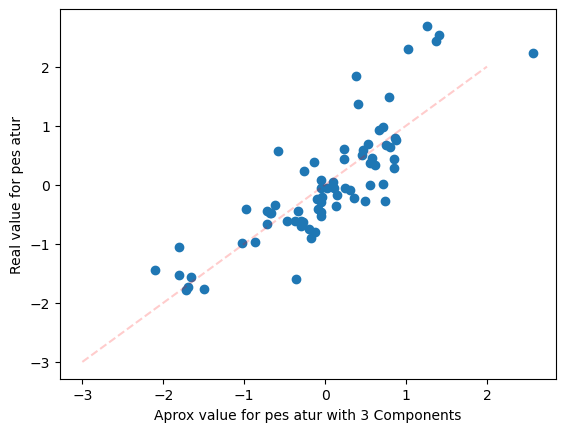

In [213]:
plt.scatter(data_approx_df["pes_atur"], scaled_full_df["pes_atur"])
lims=3
plt.plot(np.arange(-lims,lims), np.arange(-lims,lims), color="red", alpha=.2, linestyle="--")
plt.xlabel("Aprox value for pes atur with 3 Components")
plt.ylabel("Real value for pes atur")

## 7. Conclusions

After all the exploration, processing, visualization and dimensionality reduction done, we can already take some conclusions from our dataset, and even answer some of the initial questions we had posed.

First of all we can see that although our dataset consists of 27 features, through PCA we can identify 5 components which already can describe 70% of our variance, or 3 components that can explain 50% of the variance. This means, that with few components, we can reconstitute the original data with little error. This can be seen in the last plot "Real value vs Aprox Value with 3 components" where we see that only using the components we get a good estimate of what the real value of "pes atur" is. Thus, using Dimensionality reduction tecniques we can efficiently reduce the size of our data. This is important for instance when we want to feed data to a machine learning pipeline, because using less features that capture similar amount of information can speed up the training step. This can also be used for data compression, for instance images.

This also means that our features are not completely independent after all. This we have seen when we have looked at the correlation matrices. Indeed, knowing that a neighborhood has a large household income, we can assume that the mean person income will be high too, and that unemployment (pes atur) will be low, and to a less extend it also correlates with lower migration and lower density. This tells us a lot about Barcelona: People in rich neighborhoods have more space, less unemployment, and there is less incomers and outgoers. People who move in are not likely to leave, and it is difficult to move in.

Looking at the corresponding loadings for each PC, we can see which variables are most important. For PC1 we see that the high number of trees, accidents, cars and pharmacies are very important. For PC2 high number of hotels, and pensions, and high income, together with low number of animals are its more defeaning features.

If we look at some neighbours and were to they appear in the PC subspace, we see that La Font de'n Fargues is kind of an outlier with very high PC1 loading, followed by La Marina del Prat Vermell. The rest of neighbours have more similar PC1. This is interesting because a priori we wouldn't think that these two neighbours are similar. Font de'n fagues is a residental neighborhood whereas La Marina del Prat is a rather tough neighborhood. This more in depth analysis escapes the scope of this first part of the project, hopefully we can investigate this further in the second part. For PC2 we find el Barri Gòtic i la Dreta de l'Eixample with its highest PC2 loadings, which we saw to be related to tourism, and is expected because they are the center of Barcelona.

Lastly we see that indeed neigborhoods in the same district then to be closer to each other in the PC subspace, indicating that they share some similarities.